In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#importing data
df        = pd.read_csv("Finaldemand.csv")
df1       = pd.read_csv("ML_with_test.csv")
df2       = pd.read_csv("filtered.csv")
rfmTable  = pd.read_csv("rfmTable.csv")
rfmTablef = pd.read_csv("rfmTablef.csv")
forecast  = pd.read_csv("forecast_feature.csv")  

forecast_sales  = pd.read_csv("forecast_feature_sales.csv") 
forecast_MP     = pd.read_csv("forecast_feature_MP.csv")
forecast_IDP    = pd.read_csv("forecast_feature_IDP.csv")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
forecast.head()
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6654609 entries, 0 to 6654608
Data columns (total 8 columns):
basedate            object
forecastDate        object
forecastGroup       object
customerParentID    int64
forecastquantity    float64
tdiff               int64
forecast month      int64
forecast Year       int64
dtypes: float64(1), int64(4), object(3)
memory usage: 406.2+ MB


In [4]:
forecast["is_duplicate"]= forecast.duplicated(subset=['customerParentID','forecastGroup','forecastDate'])
forecast['is_duplicate'].value_counts()

True     5850337
False     804272
Name: is_duplicate, dtype: int64

In [5]:
forecast = forecast.groupby(['customerParentID','forecastGroup','forecast Year','forecast month','tdiff'],as_index=False)['forecastquantity'].sum()
#forecast = forecast[forecast['tdiff'] ==6]

forecast.head()
forecast =  forecast.rename(columns= {'forecast Year' : 'PCRD Year','forecast month' : 'PCRD Month'})

forecast_sales = forecast_sales.groupby(['customerParentID','forecastGroup','forecast Year','forecast month','tdiff'],as_index=False)['forecastquantity'].sum()
#forecast = forecast[forecast['tdiff'] ==6]

forecast_sales.head()
forecast_sales =  forecast_sales.rename(columns= {'forecast Year' : 'PCRD Year','forecast month' : 'PCRD Month'})

forecast_MP = forecast_MP.groupby(['customerParentID','forecastGroup','forecast Year','forecast month','tdiff'],as_index=False)['forecastquantity'].sum()
#forecast = forecast[forecast['tdiff'] ==6]

forecast_MP.head()
forecast_MP =  forecast_MP.rename(columns= {'forecast Year' : 'PCRD Year','forecast month' : 'PCRD Month'})

forecast_IDP = forecast_IDP.groupby(['customerParentID','forecastGroup','forecast Year','forecast month','tdiff'],as_index=False)['forecastquantity'].sum()
#forecast = forecast[forecast['tdiff'] ==6]

forecast_IDP.head()
forecast_IDP =  forecast_IDP.rename(columns= {'forecast Year' : 'PCRD Year','forecast month' : 'PCRD Month'})

In [6]:
forecast.head()
forecast_sales.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,tdiff,forecastquantity
0,100083,856532,2017,1,6,7694.0
1,100083,856532,2017,2,6,4613.0
2,100083,856532,2017,2,7,6154.0
3,100083,856532,2017,3,6,4000.0
4,100083,856532,2017,3,7,4616.0


In [7]:
forecast['tdiffmin'] = forecast.groupby(['PCRD Year','PCRD Month','forecastGroup','customerParentID'])['tdiff'].transform('min')
forecast=forecast[forecast['tdiffmin']==forecast['tdiff']]
forecast=forecast.drop(['tdiffmin'],axis=1)
forecast = forecast.reset_index(drop = True)
forecast.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,tdiff,forecastquantity
0,100083,856532,2017,1,6,7694.0
1,100083,856532,2017,2,6,4613.0
2,100083,856532,2017,3,6,3800.0
3,100083,856532,2017,4,6,4431.0
4,100083,856532,2017,5,6,5539.0


In [8]:
forecast_sales['tdiffmin'] = forecast_sales.groupby(['PCRD Year','PCRD Month','forecastGroup','customerParentID'])['tdiff'].transform('min')
forecast_sales             = forecast_sales[forecast_sales['tdiffmin']==forecast_sales['tdiff']]
forecast_sales             = forecast_sales.drop(['tdiffmin'],axis=1)

forecast_sales = forecast_sales.reset_index(drop = True)
forecast_sales.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,tdiff,forecastquantity
0,100083,856532,2017,1,6,7694.0
1,100083,856532,2017,2,6,4613.0
2,100083,856532,2017,3,6,4000.0
3,100083,856532,2017,4,6,4615.0
4,100083,856532,2017,5,6,5769.0


In [9]:
forecast_IDP['tdiffmin'] = forecast_IDP.groupby(['PCRD Year','PCRD Month','forecastGroup','customerParentID'])['tdiff'].transform('min')
forecast_IDP             = forecast_IDP[forecast_IDP['tdiffmin']==forecast_IDP['tdiff']]
forecast_IDP             = forecast_IDP.drop(['tdiffmin'],axis=1)

forecast_IDP = forecast_IDP.reset_index(drop = True)
forecast_IDP.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,tdiff,forecastquantity
0,100083,856532,2017,5,6,5539.0
1,100083,856532,2017,6,6,3960.0
2,100083,856532,2017,7,6,6256.0
3,100083,856532,2017,8,6,4748.0
4,100083,856532,2017,9,6,3996.0


In [10]:
forecast_MP['tdiffmin'] = forecast_MP.groupby(['PCRD Year','PCRD Month','forecastGroup','customerParentID'])['tdiff'].transform('min')
forecast_MP             = forecast_MP[forecast_MP['tdiffmin']==forecast_MP['tdiff']]
forecast_MP             = forecast_MP.drop(['tdiffmin'],axis=1)

forecast_MP = forecast_MP.reset_index(drop = True)
forecast_MP.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,tdiff,forecastquantity
0,100083,856532,2017,2,6,4613.0
1,100083,856532,2017,3,6,3800.0
2,100083,856532,2017,4,6,4427.0
3,100083,856532,2017,5,6,5534.0
4,100083,856532,2017,6,6,3960.0


In [11]:
forecast['tdiff'].value_counts()

6     60772
7      9077
8      4642
9      4326
11     4204
10     4174
12     3931
13     3845
14     3670
17     3221
15     3186
16     3167
18     2983
20     2978
19     2972
23     2838
22     2758
21     2738
24     2636
25     2588
26     2546
27     2449
28     2407
29     2389
31     2193
30     2184
32     2132
33     1997
34     1906
35     1753
53     1430
52     1426
50     1424
55     1423
56     1420
51     1412
57     1411
54     1410
49     1361
48     1335
47     1325
36     1285
42     1283
46     1280
43     1276
59     1275
58     1274
44     1263
45     1257
41     1247
60     1246
40     1208
61     1193
39     1188
38     1175
37     1153
62      834
Name: tdiff, dtype: int64

In [12]:
forecast_sales['tdiff'].value_counts()

6     61746
7      6936
8      4475
9      4121
11     4028
10     3957
12     3744
13     3656
14     3472
15     2976
17     2966
16     2929
18     2700
20     2682
19     2664
35     2570
36     2511
34     2486
23     2486
21     2376
22     2354
24     2202
25     2117
26     2085
27     1902
28     1844
29     1804
30     1505
31     1472
32     1388
33     1089
37      971
38      721
39        2
Name: tdiff, dtype: int64

In [13]:
#exploring data
print(df.head())
print(df1.head())
print(rfmTable.head())
print(rfmTablef.head())

  orderNumber orderLine           material orderDate      PCRD forecastGroup  \
0     1163546       100     QM56022TR13-5K  20180116  20180116       QM56022   
1     1170176        11     QM56022TR13-5K  20180212  20180212       QM56022   
2    60016739        10  QM14003TR13-5KSAM  20160825  20160825       QM14003   
3     1126061        30            1115069  20171024  20171024        885075   
4     1198392        50     RF5212ATR13-5K  20180823  20180823       RF5212A   

   customerParentID  demandQuantity     dollars forecastGroup.1 pdpStage  \
0            102572      -2392930.0 -2251747.13         QM56022      PD6   
1            102572      -1230000.0 -1157430.00         QM56022      PD6   
2            100099       -874602.0   -95331.62         QM14003      PD7   
3            102572       -621243.0  -129839.79          885075      PD6   
4            107372       -585000.0  -218790.00         RF5212A      PD6   

   pdpKickoffDate  pdpProdReleaseDate      marketSubgroup busi

In [14]:
#filtering the data
df = df[df['customerParentID'].isin([100083, 100099, 100105, 100110, 100111, 100113, 100345, 100498,
       100582, 100617, 100698, 100709, 100773, 100861, 100941, 101077,
       101097, 101100, 101325, 101333, 101395, 101431, 101600, 101653,
       101687, 101737, 101976, 102012, 102044, 102521, 102567, 102572,
       102771, 102959, 103110, 103462, 103474, 103576, 103627, 103638,
       103926, 103952, 104000, 104209, 104288, 104331, 104352, 104361,
       104389, 104409, 104423, 104522, 104784, 104791, 104866, 105340,
       105410, 105515, 105591, 105639, 105697, 105698, 105699, 105758,
       105814, 105856, 106091, 106246, 106294, 106357, 106372, 107313,
       107363, 107364, 107367, 107372, 107378, 107384, 107409, 107441,
       107466, 107484, 107498, 107652, 107806, 108058])]

df = df[df['forecastGroup'].isin(df2['forecastGroup'].unique())]

df1 = df1[df1['customerParentID'].isin([100083, 100099, 100105, 100110, 100111, 100113, 100345, 100498,
       100582, 100617, 100698, 100709, 100773, 100861, 100941, 101077,
       101097, 101100, 101325, 101333, 101395, 101431, 101600, 101653,
       101687, 101737, 101976, 102012, 102044, 102521, 102567, 102572,
       102771, 102959, 103110, 103462, 103474, 103576, 103627, 103638,
       103926, 103952, 104000, 104209, 104288, 104331, 104352, 104361,
       104389, 104409, 104423, 104522, 104784, 104791, 104866, 105340,
       105410, 105515, 105591, 105639, 105697, 105698, 105699, 105758,
       105814, 105856, 106091, 106246, 106294, 106357, 106372, 107313,
       107363, 107364, 107367, 107372, 107378, 107384, 107409, 107441,
       107466, 107484, 107498, 107652, 107806, 108058])]

df1 = df1[df1['forecastGroup'].isin(df2['forecastGroup'].unique())]

In [15]:
df1 = df1.reset_index(drop = True)

In [16]:
# calculating lead time variables
df['orderDate']   = pd.to_datetime(df['orderDate'],format='%Y%m%d')
df['PCRD']        = pd.to_datetime(df['PCRD'],format='%Y%m%d')
df                = df[df['PCRD'].isin(pd.date_range('2016-01-01','2018-06-30'))]
delta             = df.groupby(['customerParentID','forecastGroup','orderDate','PCRD'],as_index=False)['demandQuantity','dollars'].sum()
delta['leadTime'] = (delta['PCRD']-delta['orderDate']).dt.days
zz                = delta.groupby(['customerParentID','forecastGroup'],as_index=False).agg({'leadTime' : ['mean','std','median','min','max']})
zz.columns        = [''.join(col) for col in zz.columns.values]
df1               = pd.merge(df1,zz,on=['customerParentID','forecastGroup'],how='left')

In [17]:
df = df.reset_index(drop = True)
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,kickofftimediff,pdpProdReleaseDate_year,pdpProdReleaseDate_month,prodrelasetimediff,prodkicktimediff,leadTimemean,leadTimestd,leadTimemedian,leadTimemin,leadTimemax
0,100083,856020,2016,1,0.0,0.0,NaN,NaN,NaN,NaN,...,24,2006,10,111,-87,4.5,6.608076,2.0,0,14
1,100083,856020,2016,2,0.0,0.0,NaN,NaN,NaN,NaN,...,25,2006,10,112,-87,4.5,6.608076,2.0,0,14
2,100083,856020,2016,3,0.0,0.0,NaN,NaN,NaN,NaN,...,26,2006,10,113,-87,4.5,6.608076,2.0,0,14
3,100083,856020,2016,4,0.0,0.0,NaN,NaN,NaN,NaN,...,27,2006,10,114,-87,4.5,6.608076,2.0,0,14
4,100083,856020,2016,5,0.0,0.0,NaN,NaN,NaN,NaN,...,28,2006,10,115,-87,4.5,6.608076,2.0,0,14


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272592 entries, 0 to 272591
Data columns (total 82 columns):
customerParentID             272592 non-null int64
forecastGroup                272592 non-null object
PCRD Year                    272592 non-null int64
PCRD Month                   272592 non-null int64
demandQuantity               227160 non-null float64
dollars                      227160 non-null float64
lag_6                        227160 non-null float64
lag_7                        219588 non-null float64
lag_8                        212016 non-null float64
lag_9                        204444 non-null float64
lag_10                       196872 non-null float64
lag_11                       189300 non-null float64
lag_12                       181728 non-null float64
lag_15                       159012 non-null float64
lag_18                       136296 non-null float64
roll_mean_2                  227160 non-null float64
roll_mean_3                  227160 non-null flo

In [19]:
#importing calendar
fc = pd.read_csv("fiscalcalendar.csv")
fc.head()

,fiscalDate,fiscalWeek,fiscalPeriod,fiscalQuarter,fiscalYear
0,19980329,199901,199901,1999-1,1999
1,19980330,199901,199901,1999-1,1999
2,19980331,199901,199901,1999-1,1999
3,19980401,199901,199901,1999-1,1999
4,19980402,199901,199901,1999-1,1999


In [20]:
fc['fiscalDate'] = pd.to_datetime(fc['fiscalDate'],format='%Y%m%d')
delta            = pd.merge(delta,fc[['fiscalDate','fiscalWeek']],left_on='PCRD',right_on='fiscalDate',how='left')

delta.head()

,customerParentID,forecastGroup,orderDate,PCRD,demandQuantity,dollars,leadTime,fiscalDate,fiscalWeek
0,100083,856020,2016-09-25,2016-09-25,8000.0,154480.0,0,2016-09-25,201726
1,100083,856020,2016-09-27,2016-09-27,2000.0,4600.0,0,2016-09-27,201726
2,100083,856020,2017-01-09,2017-01-23,2000.0,4600.0,14,2017-01-23,201743
3,100083,856020,2018-05-24,2018-05-28,2000.0,4600.0,4,2018-05-28,201909
4,100083,856532,2016-07-17,2016-07-17,5000.0,5450.0,0,2016-07-17,201716


In [21]:
#logarithm of demand
df1['demandQuantity'] =  df1['demandQuantity'].apply(pd.np.log1p)

In [22]:
#calculating the wag and fickle variables
delta                      = delta.groupby(['customerParentID','forecastGroup','PCRD','fiscalWeek'],as_index=False)['demandQuantity','dollars'].sum()
delta['demandQuantity']    = delta['demandQuantity'].apply(pd.np.log1p)
delta['dollars']           = delta['dollars'].apply(pd.np.log1p)
delta['change_in_order']   = delta.groupby(['customerParentID','forecastGroup'])['demandQuantity'].rolling(window=2).apply(lambda x : x[1]-x[0]).reset_index(drop=True)
delta['change_in_dollars'] = delta.groupby(['customerParentID','forecastGroup'])['dollars'].rolling(window=2).apply(lambda x : x[1]-x[0]).reset_index(drop=True)
delta['lag']               = delta.groupby(['customerParentID','forecastGroup'])['PCRD'].shift(1)
delta['delta']             = (delta['PCRD']-delta['lag']).dt.days

In [23]:
delta.head()

,customerParentID,forecastGroup,PCRD,fiscalWeek,demandQuantity,dollars,change_in_order,change_in_dollars,lag,delta
0,100083,856020,2016-09-25,201726,8.987322,11.947826,NaN,NaN,NaT,NaN
1,100083,856020,2016-09-27,201726,7.601402,8.434029,-1.385919,-3.513797,2016-09-25,2.0
2,100083,856020,2017-01-23,201743,7.601402,8.434029,0.000000,0.000000,2016-09-27,118.0
3,100083,856020,2018-05-28,201909,7.601402,8.434029,0.000000,0.000000,2017-01-23,490.0
4,100083,856532,2016-07-17,201716,8.517393,8.603554,NaN,NaN,NaT,NaN


In [24]:
delta             = delta.groupby(['customerParentID','forecastGroup','fiscalWeek'],as_index=False).agg({'change_in_order' : 'sum','change_in_dollars' : 'sum','delta' : 'max'})
zz                = delta.groupby(['customerParentID','forecastGroup'],as_index=False).agg({'change_in_order' : ['mean','median','std','min','max'],'change_in_dollars' : ['mean','median','std','min','max'],'delta' : ['mean','median','std','min','max']})
zz.columns        = [''.join(col) for col in zz.columns.values]
df1               = pd.merge(df1,zz,on=['customerParentID','forecastGroup'],how='left')

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272592 entries, 0 to 272591
Data columns (total 97 columns):
customerParentID             272592 non-null int64
forecastGroup                272592 non-null object
PCRD Year                    272592 non-null int64
PCRD Month                   272592 non-null int64
demandQuantity               227160 non-null float64
dollars                      227160 non-null float64
lag_6                        227160 non-null float64
lag_7                        219588 non-null float64
lag_8                        212016 non-null float64
lag_9                        204444 non-null float64
lag_10                       196872 non-null float64
lag_11                       189300 non-null float64
lag_12                       181728 non-null float64
lag_15                       159012 non-null float64
lag_18                       136296 non-null float64
roll_mean_2                  227160 non-null float64
roll_mean_3                  227160 non-null flo

In [26]:
df1['fickleorder'] = df1['change_in_ordermean']/df1['deltamean']
df1['fickledollar'] = df1['change_in_dollarsmean']/df1['deltamean']


In [27]:
#forecast


In [28]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272592 entries, 0 to 272591
Data columns (total 99 columns):
customerParentID             272592 non-null int64
forecastGroup                272592 non-null object
PCRD Year                    272592 non-null int64
PCRD Month                   272592 non-null int64
demandQuantity               227160 non-null float64
dollars                      227160 non-null float64
lag_6                        227160 non-null float64
lag_7                        219588 non-null float64
lag_8                        212016 non-null float64
lag_9                        204444 non-null float64
lag_10                       196872 non-null float64
lag_11                       189300 non-null float64
lag_12                       181728 non-null float64
lag_15                       159012 non-null float64
lag_18                       136296 non-null float64
roll_mean_2                  227160 non-null float64
roll_mean_3                  227160 non-null flo

In [29]:
df = df[df['PCRD'].isin(pd.date_range('2016-01-01','2018-06-30'))]
df = df.reset_index(drop = True)     

In [30]:
# caclulating min and max dates
min_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].min()
min_df['Min Year']  = min_df['PCRD'].dt.year
min_df['Min Month'] = min_df['PCRD'].dt.month

max_df              = df.groupby(['customerParentID','forecastGroup'],as_index=False)['PCRD'].max()
max_df['Max Year']  = max_df['PCRD'].dt.year
max_df['Max Month'] = max_df['PCRD'].dt.month

In [31]:
df1 = pd.merge(df1,min_df.drop('PCRD',axis=1),on=['customerParentID','forecastGroup'],how='left')
df1 = pd.merge(df1,max_df.drop('PCRD',axis=1),on=['customerParentID','forecastGroup'],how='left')    

In [32]:
df1['maxdiff']   = ((df1['Max Year']-df1['Min Year']) * 12 + df1['Max Month']-df1['Min Month'])
df1['maxdiff2']  = np.abs((df1['PCRD Year']-df1['Max Year']) * 12 + df1['PCRD Month']-df1['Max Month'])
df1['maxdiff1']  = (df1['PCRD Year'].max()-df1['Max Year']) * 12 + 12-df1['Max Month']
df1['mindiff']   = (df1['PCRD Year']-df1['Min Year']) * 12 + df1['PCRD Month']-df1['Min Month']
df1['mindiff1']  = (df1['PCRD Year'].max()-df1['Min Year']) * 12 + 12-df1['Min Month']

In [33]:
df1 = df1.drop(df1[(df1['PCRD Year']-df1['Min Year']) * 12 + df1['PCRD Month']-df1['Min Month'] <0 ].index).reset_index(drop=True)

In [34]:
#forecast
df1 = pd.merge(df1,forecast[['customerParentID','forecastGroup','PCRD Year','PCRD Month','forecastquantity']],on = ['customerParentID','forecastGroup','PCRD Year','PCRD Month'],how='left')
df1 = df1.rename(columns = {'forecastquantity' : 'forecastquantity_bu'})
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 109 entries, customerParentID to forecastquantity_bu
dtypes: float64(82), int64(24), object(3)
memory usage: 159.1+ MB


In [35]:
#forecast
df1 = pd.merge(df1,forecast_sales[['customerParentID','forecastGroup','PCRD Year','PCRD Month','forecastquantity']],on = ['customerParentID','forecastGroup','PCRD Year','PCRD Month'],how='left')
df1 = df1.rename(columns = {'forecastquantity' : 'forecastquantity_sales'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 110 entries, customerParentID to forecastquantity_sales
dtypes: float64(83), int64(24), object(3)
memory usage: 160.6+ MB


In [36]:
df1 = pd.merge(df1,forecast_MP[['customerParentID','forecastGroup','PCRD Year','PCRD Month','forecastquantity']],on = ['customerParentID','forecastGroup','PCRD Year','PCRD Month'],how='left')
df1 = df1.rename(columns = {'forecastquantity' : 'forecastquantity_mp'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 111 entries, customerParentID to forecastquantity_mp
dtypes: float64(84), int64(24), object(3)
memory usage: 162.0+ MB


In [37]:
df1 = pd.merge(df1,forecast_IDP[['customerParentID','forecastGroup','PCRD Year','PCRD Month','forecastquantity']],on = ['customerParentID','forecastGroup','PCRD Year','PCRD Month'],how='left')
df1 = df1.rename(columns = {'forecastquantity' : 'forecastquantity_idp'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 112 entries, customerParentID to forecastquantity_idp
dtypes: float64(85), int64(24), object(3)
memory usage: 163.5+ MB


In [38]:
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,Max Month,maxdiff,maxdiff2,maxdiff1,mindiff,mindiff1,forecastquantity_bu,forecastquantity_sales,forecastquantity_mp,forecastquantity_idp
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,5,20,20,7,0,27,NaN,NaN,NaN,NaN
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,5,20,19,7,1,27,NaN,NaN,NaN,NaN
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,5,20,18,7,2,27,NaN,NaN,NaN,NaN
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,5,20,17,7,3,27,NaN,NaN,NaN,NaN
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,5,20,16,7,4,27,NaN,NaN,NaN,NaN


In [39]:
df1['forecastquantity_bu'].count()

59626

In [40]:
df1['forecastquantity_sales'].count()

58734

In [41]:
df1['forecastquantity_mp'].count()

53208

In [42]:
df1['forecastquantity_idp'].count()

47522

In [43]:
#converting forecast to logarithm scale
df1['forecastquantity_bu'] =  df1['forecastquantity_bu'].apply(pd.np.log1p)
df1['forecastquantity_sales'] =  df1['forecastquantity_sales'].apply(pd.np.log1p)
df1['forecastquantity_mp'] =  df1['forecastquantity_mp'].apply(pd.np.log1p)
df1['forecastquantity_idp'] =  df1['forecastquantity_idp'].apply(pd.np.log1p)
df1.loc[:,'forecastclass'] = 1
df1.loc[df1['forecastquantity_bu'] ==0,'forecastclass'] = 0
df1.loc[:, 'forecastquantity_bu'].fillna(0, inplace=True)
df1.loc[(df1['forecastquantity_bu'] ==0) & (df1['forecastclass'] ==1),'forecastclass'] = 2

In [44]:
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,maxdiff,maxdiff2,maxdiff1,mindiff,mindiff1,forecastquantity_bu,forecastquantity_sales,forecastquantity_mp,forecastquantity_idp,forecastclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,20,20,7,0,27,0.0,NaN,NaN,NaN,2
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,20,19,7,1,27,0.0,NaN,NaN,NaN,2
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,20,18,7,2,27,0.0,NaN,NaN,NaN,2
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,20,17,7,3,27,0.0,NaN,NaN,NaN,2
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,20,16,7,4,27,0.0,NaN,NaN,NaN,2


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 113 entries, customerParentID to forecastclass
dtypes: float64(85), int64(25), object(3)
memory usage: 164.9+ MB


In [46]:
#df1['numberofnonzero'] = df1.groupby(['customerParentID','forecastGroup'])['demandQuantity'].transform(lambda x : (x!=0).sum())

In [47]:
seasons         = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))

df1['Season']   = df1['PCRD Month'].map(month_to_season)

In [48]:
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,maxdiff2,maxdiff1,mindiff,mindiff1,forecastquantity_bu,forecastquantity_sales,forecastquantity_mp,forecastquantity_idp,forecastclass,Season
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,20,7,0,27,0.0,NaN,NaN,NaN,2,Fall
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,19,7,1,27,0.0,NaN,NaN,NaN,2,Fall
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,18,7,2,27,0.0,NaN,NaN,NaN,2,Fall
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,17,7,3,27,0.0,NaN,NaN,NaN,2,Winter
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,16,7,4,27,0.0,NaN,NaN,NaN,2,Winter


In [49]:
#counting the number of succesive zeros till lag6
def myfunc(rolling_window) :
    count=0
    n=len(rolling_window)
    if rolling_window[-1]!=0 :
        return 0
    else :
        for i in range(0,n) :
                if rolling_window[n-i-1] ==0 :
                    count=count + 1
                else :
                    break
        return count

    
df1['zerocum']=df1.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=50,min_periods=1).apply(myfunc).reset_index(drop=True)
#df2['zerocum']=df2.groupby(['customerParentID','forecastGroup'])['demandQuantity'].shift(6).rolling(window=50,min_periods=1).apply(myfunc)

In [50]:
#counting the number of succesive nonzeros till lag6
def myfunc2(rolling_window) :
    count=0
    n=len(rolling_window)
    if rolling_window[-1]==0 :
        return 0
    else :
        for i in range(0,n) :
                if rolling_window[n-i-1]!=0 :
                    count=count + 1
                else :
                    break
        return count

    
df1['nonzerocum']=df1.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=50,min_periods=1).apply(myfunc2).reset_index(drop=True)
#df2['zerocum']=df2.groupby(['customerParentID','forecastGroup

In [51]:
# counting the the difference in the number of months between the previous two non zero values
def myfunc1(rolling_window) : 
    n=len(rolling_window)
    k=n
    for i in range(0,n) :
        if rolling_window[n-i-1]!=0 : 
            k=n-i-1
            break
        else :
            k=n
    m=k
    for i in range(0,k) : 
        if rolling_window[k-i-1] !=0 :
            m=k-i-1
            break
        else :
            m=k
    return k-m
    
df1['nzinterval']=df1.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=50,min_periods=1).apply(myfunc1).reset_index(drop=True)

In [52]:
# counting the the difference between the previous two non zero values
def myfunc5(rolling_window) : 
    n=len(rolling_window)
    k=n
    p=rolling_window[n-1]
    for i in range(0,n) :
        if rolling_window[n-i-1]!=0 : 
            k = n-i-1
            p = rolling_window[n-i-1]
            break
        else :
            k = n
            p = rolling_window[n-1]
    m = k
    q = rolling_window[k-1]
    for i in range(0,k) : 
        if rolling_window[k-i-1] !=0 :
            m = k-i-1
            q = rolling_window[k-i-1]
            break
        else :
            m = k
            q = rolling_window[k-1]
    return p-q
    
df1['diff_betw_lasttwo_nonzeros']=df1.groupby(['customerParentID','forecastGroup'])['lag_6'].rolling(window=50,min_periods=1).apply(myfunc5).reset_index(drop=True)

In [53]:
df1.head(40)

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,forecastquantity_bu,forecastquantity_sales,forecastquantity_mp,forecastquantity_idp,forecastclass,Season,zerocum,nonzerocum,nzinterval,diff_betw_lasttwo_nonzeros
0,100083,856020,2016,9,9.210440,159080.0,0.000000,0.000000,0.000000,NaN,...,0.000000,NaN,NaN,NaN,2,Fall,1.0,0.0,0.0,0.000000
1,100083,856020,2016,10,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Fall,2.0,0.0,0.0,0.000000
2,100083,856020,2016,11,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Fall,3.0,0.0,0.0,0.000000
3,100083,856020,2016,12,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Winter,4.0,0.0,0.0,0.000000
4,100083,856020,2017,1,7.601402,4600.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Winter,5.0,0.0,0.0,0.000000
5,100083,856020,2017,2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Winter,6.0,0.0,0.0,0.000000
6,100083,856020,2017,3,0.000000,0.0,9.210440,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Spring,0.0,1.0,0.0,9.210440
7,100083,856020,2017,4,0.000000,0.0,0.000000,9.210440,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,2,Spring,1.0,0.0,0.0,9.210440
8,100083,856020,2017,5,0.000000,0.0,0.000000,0.000000,9.210440,0.000000,...,0.000000,NaN,NaN,NaN,2,Spring,2.0,0.0,0.0,9.210440
9,100083,856020,2017,6,0.000000,0.0,0.000000,0.000000,0.000000,9.210440,...,0.000000,NaN,NaN,NaN,2,Summer,3.0,0.0,0.0,9.210440


In [54]:
#joining with rfm table
df1 = pd.merge(df1,rfmTable.drop(['clusters'],axis=1),on='customerParentID',how='left')
df1 = pd.merge(df1,rfmTablef.drop(['clusters'],axis=1),on='forecastGroup',how='left')

In [55]:
rfmTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
customerParentID    401 non-null int64
recency             401 non-null int64
frequency           401 non-null int64
monetary_value      401 non-null float64
nu_of_mat           401 non-null int64
delta               317 non-null float64
fickle              400 non-null float64
logm                401 non-null float64
logf                401 non-null float64
logr                401 non-null float64
clusters            401 non-null int64
buckets             401 non-null object
dtypes: float64(6), int64(5), object(1)
memory usage: 37.7+ KB


In [56]:
rfmTablef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 9 columns):
forecastGroup     3746 non-null object
recency           3746 non-null int64
frequency         3746 non-null int64
monetary_value    3746 non-null float64
logm              3746 non-null float64
logf              3746 non-null float64
logr              3746 non-null float64
clusters          3746 non-null int64
count_of_cus      3746 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 263.5+ KB


In [57]:
#mean encoding
df1['pdpStage']            = df1.replace(0,np.NaN).groupby('pdpStage')['demandQuantity'].transform('mean')
df1['marketSubgroup']      = df1.replace(0,np.NaN).groupby('marketSubgroup')['demandQuantity'].transform('mean')
df1['businessGroup']       = df1.replace(0,np.NaN).groupby('businessGroup')['demandQuantity'].transform('mean')
df1['vcMarketingManager']  = df1.replace(0,np.NaN).groupby('vcMarketingManager')['demandQuantity'].transform('mean')
df1['vcProductManager']    = df1.replace(0,np.NaN).groupby('vcProductManager')['demandQuantity'].transform('mean')
df1['Season']              = df1.replace(0,np.NaN).groupby('Season')['dollars'].transform('mean')
df1['PCRD_Monthmean']      = df1.replace(0,np.NaN).groupby('PCRD Month')['demandQuantity'].transform('mean')

In [58]:
df1['Last_month_Diff'] = df1.groupby(['customerParentID','forecastGroup'])['lag_6'].diff()
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,buckets,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,Best,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,Best,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.0
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,Best,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,0.0
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,Best,36,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,0.0
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,Best,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0


In [59]:
#df1['demandQuantity'] =  df1['demandQuantity'].apply(pd.np.log1p)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 137 entries, customerParentID to Last_month_Diff
dtypes: float64(107), int64(28), object(2)
memory usage: 204.6+ MB


In [61]:
#splitting into test and train
df1['demclass']  = np.where(df1['demandQuantity']==0,0,1)
df_test          = df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([1,2,3,4,5,6]))]
df_train         = df1.drop(df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))].index)
df_main_test     = df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([7,8,9,10,11,12]))]
#df_train = df_train.drop(df_train[(df_train['PCRD Year']-df_train['Min Year']) * 12 + df_train['PCRD Month']-df_train['Min Month'] <0 ].index)
weights          = np.where(df_train['demandQuantity']==0,0,1)
#df_train = df_train.sample(frac=2.0,weights = weights,replace=True,random_state=42)
df_train = df_train[df_train['demandQuantity'] != 0]
X_train           = df_train.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
X_test            = df_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
X_main_test       = df_main_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
y_train           = df_train[['demandQuantity']]
y_test            = df_test[['demandQuantity']]
X_test            = X_test.replace([np.inf, -np.inf], 0)
X_train           = X_train.replace([np.inf, -np.inf], 0)

In [62]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [63]:
df_train['demclass'].value_counts()

1    38781
Name: demclass, dtype: int64

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38781 entries, 0 to 189584
Columns: 138 entries, customerParentID to demclass
dtypes: float64(107), int32(1), int64(28), object(2)
memory usage: 41.0+ MB


In [65]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43786 entries, 16 to 189590
Columns: 138 entries, customerParentID to demclass
dtypes: float64(107), int32(1), int64(28), object(2)
memory usage: 46.3+ MB


In [66]:
#df_train[df_train['demandQuantity'] < 2.5]['dollars'].plot(kind='hist')

In [67]:
df_train[df_train['demandQuantity'] < 2.5]['forecastGroup'].nunique()

790

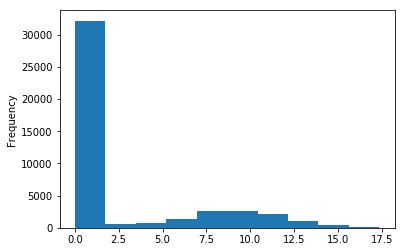

In [68]:
df_test['demandQuantity'].plot(kind='hist')

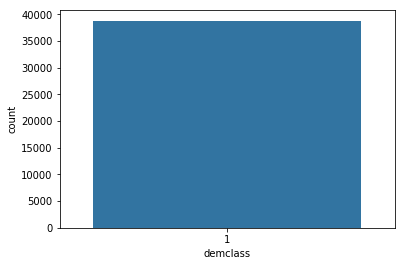

In [69]:
sns.countplot(data=df_train,x='demclass')

In [70]:
#eval functions
def mape(preds, target):
    '''
    Function to calculate SMAPE
    '''
#     n = len(target!=0)
#     masked_arr = ~(target==0) 
#     preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(target)
#     smape_val = 100 * np.median(num/denom)
    smape_val = 100 * np.sum(num)/np.sum(denom)
    return smape_val

def lgbm_mape(preds, train_data):
    '''
    Custom Evaluation Function for LGBM
    '''
    labels = train_data.get_label()
    smape_val = mape(np.expm1(preds), np.expm1(labels))
    return 'MAPE', smape_val, False

In [71]:
# import keras.backend as K
# def nnsmape(target, preds):
#     '''
#     Function to calculate SMAPE
#     '''
# #     n = len(target!=0)
# #     masked_arr = ~(target==0) 
# #     preds, target = preds[masked_arr], target[masked_arr]
#     preds = K.exp(preds - 1)
#     target= K.exp(target - 1)
#     num = K.abs(preds-target)
#     denom = K.abs(target)
# #     smape_val = 100 * np.median(num/denom)
#     smape_val = 100 * K.sum(num)/np.sum(denom)
#     return smape_val

In [72]:
d = df_train[['PCRD Year']].copy()
d.loc[d['PCRD Year']==2016,'y_category'] = 0.1
d.loc[d['PCRD Year']==2017,'y_category'] = 0.75
d.loc[d['PCRD Year']==2018,'y_category'] = 1

weights_Data = d['y_category']

In [73]:
d.head()

,PCRD Year,y_category
0,2016,0.10
4,2017,0.75
28,2016,0.10
29,2016,0.10
32,2016,0.10


In [74]:
df_train.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN,1
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1
28,100083,856532,2016,7,8.517393,5450.0,0.0,NaN,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,7.979703,NaN,1
29,100083,856532,2016,8,8.517393,5450.0,0.0,0.0,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,8.328061,0.0,1
32,100083,856532,2016,11,9.615872,16350.0,0.0,0.0,0.0,0.0,...,4,23,196587.5,12.188868,3.178054,1.609438,8,8.366949,0.0,1


In [75]:
df2_ridge = df1.copy()
df2_ridge = df2_ridge.replace([np.inf, -np.inf], np.nan)
df2_ridge.fillna(0,inplace=True)

#df_knn_train=df2_knn.drop(df2_knn[(df2_knn['PCRD Year']==2018) & (df2_knn['PCRD Month'].isin([3,4,5,6,7,8]))].index)

df_ridge_test  = df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([1,2,3,4,5,6]))]
df_ridge_train = df2_ridge.drop(df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([1,2,3,4,5,6,7,8,9,10,11,12]))].index)
df_ridge_main_test = df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([7,8,9,10,11,12]))]

In [76]:
df_ridge_train.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.0,1
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.0,0
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,0.0,0
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,0.0,0
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1


In [77]:
X_train_ridge       = df_ridge_train.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
X_test_ridge        = df_ridge_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
X_main_test_ridge   = df_ridge_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
y_train_ridge       = df_ridge_train[['demandQuantity']]
y_test_ridge        = df_ridge_test[['demandQuantity']]

y_train_ridge_class  = df_ridge_train[['demclass']]
y_test_ridge_class   = df_ridge_test[['demclass']]

In [78]:
X_train_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100379 entries, 0 to 189584
Columns: 129 entries, PCRD Month to Last_month_Diff
dtypes: float64(105), int64(24)
memory usage: 99.6 MB


In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler
scaler=MinMaxScaler() #scaling
X_train_scaled = scaler.fit_transform(X_train_ridge)
X_test_scaled  = scaler.transform(X_test_ridge)

from sklearn.linear_model import Lasso
lm = Lasso(alpha=0.1)
lm.fit(X_train_scaled,y_train_ridge)
lm.score(X_test_scaled,y_test_ridge)

0.335139195343137

In [80]:
pred_Y_val = lm.predict(X_test_scaled)
pred_Y_val = np.expm1(pred_Y_val)
Y_val      = np.expm1(df_ridge_test['demandQuantity'].values)
val_df     = pd.DataFrame(columns=['true_Y_val','pred_Y_val'])

val_df['pred_Y_val'] = pred_Y_val
val_df['true_Y_val'] = Y_val
print(val_df.shape)
print(val_df.sample(5))
print('MAPE for validation data is:{}'.format(mape(pred_Y_val, Y_val)))

(43786, 2)
       true_Y_val  pred_Y_val
22829         0.0   32.514396
2991          0.0    2.096789
37227         0.0   14.921432
1936          0.0    0.242680
18118         0.0   -0.804821
MAPE for validation data is:99.94956057397047


In [81]:
cols = ['demandQuantitybothWmean', 'demandQuantitybothQmedian',
       'demandQuantitybothWmedian', 'demandQuantitybothQmean',
       'demandQuantitybothQmin', 'prodrelasetimediff','maxdiff2',
       'change_in_ordermean', 'demandQuantitybothWmin',
       'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
       'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
       'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
       'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
       'forecastquantity_bu',
       'lag_15','change_in_dollarsmean','demandQuantitybothQstd', 'demandQuantitybothQmax',
       'demandQuantitybothWstd', 'fickledollar', 'lag_18','zerocum','leadTimestd','lag_12','maxdiff','maxdiff1']
cols = ['forecastquantity_bu','forecastquantity_sales','forecastquantity_mp','forecastquantity_idp','maxdiff','mindiff','fickleorder','kickofftimediff','ewm_0.1','deltamean']

In [82]:
X_train = X_train[cols]

X_test = X_test[cols]

# X_train = X_train[['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'mindiff', 'prodrelasetimediff',
#        'maxdiff', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity']]

# X_test = X_test[['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'mindiff', 'prodrelasetimediff',
#        'maxdiff', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity']]

In [83]:
# X_train = X_train[['demandQuantitybothWmean', 'demandQuantitybothQmean',
#         'demandQuantitybothWmedian', 'demandQuantitybothQmedian',
#        'mindiff', 'prodrelasetimediff', 'change_in_ordermean',
#        'demandQuantitybothQstd', 'maxdiff', 'fickleorder',
#        'demandQuantitybothQmin', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'kickofftimediff',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'demandQuantitybothWmin',
#        'change_in_dollarsmean', 'deltamedian', 'lag_15', 'cov_both',
#        'lag_11', 'ewm_0.1', 'fickledollar', 'roll_mean_9', 'deltamean',
#        'pricestd', 'lag_9', 'lag_18', 'change_in_ordermin',
#        'roll_median_9', 'demandQuantitybothWmax', 'lag_10', 'lag_12',
#        'roll_mean_7', 'deltastd', 'nzinterval', 'lag_8','forecastquantity']]

# X_test  = X_test[['demandQuantitybothWmean', 'demandQuantitybothQmean',
#         'demandQuantitybothWmedian', 'demandQuantitybothQmedian',
#        'mindiff', 'prodrelasetimediff', 'change_in_ordermean',
#        'demandQuantitybothQstd', 'maxdiff', 'fickleorder',
#        'demandQuantitybothQmin', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'kickofftimediff',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'demandQuantitybothWmin',
#        'change_in_dollarsmean', 'deltamedian', 'lag_15', 'cov_both',
#        'lag_11', 'ewm_0.1', 'fickledollar', 'roll_mean_9', 'deltamean',
#        'pricestd', 'lag_9', 'lag_18', 'change_in_ordermin',
#        'roll_median_9', 'demandQuantitybothWmax', 'lag_10', 'lag_12',
#        'roll_mean_7', 'deltastd', 'nzinterval', 'lag_8','forecastquantity']]

# X_train.head()

In [84]:

#weights_Data = 1-((2018-df_train['PCRD Year']))**(2018-df_train['PCRD Year'])*0.1
cols = [col for col in X_train.columns]
import lightgbm as lgb
params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
              'metric': {'mse'}, 'num_leaves': 500, 'learning_rate': 0.01, 
              'feature_fraction': 0.85, 'max_depth': 9, 'verbose': 0, 
              'num_boost_round':9000, 'nthread':-1,'early_stopping_rounds':300}
lgbtrain = lgb.Dataset(data=X_train.values, label=y_train['demandQuantity'].values,feature_name=cols)#,weight = weights)
lgbval   = lgb.Dataset(data=X_test.values, label=y_test['demandQuantity'].values, 
                     reference=lgbtrain,feature_name=cols)

evals_result = {}
model        = lgb.train(params, lgbtrain,num_boost_round=params['num_boost_round'], 
                      valid_sets=[lgbtrain, lgbval], feval=lgbm_mape,
                      verbose_eval=200)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:107: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 300 rounds.
[200]	training's l2: 3.88399	training's MAPE: 81.019	valid_1's l2: 36.9564	valid_1's MAPE: 87.5696
[400]	training's l2: 3.15163	training's MAPE: 63.159	valid_1's l2: 35.5661	valid_1's MAPE: 81.1949
[600]	training's l2: 2.88176	training's MAPE: 59.0612	valid_1's l2: 35.0576	valid_1's MAPE: 82.5885
Early stopping, best iteration is:
[372]	training's l2: 3.20324	training's MAPE: 64.378	valid_1's l2: 35.6903	valid_1's MAPE: 80.9022


In [85]:
print("Features importance...")

gain     = model.feature_importance('gain')
feat_imp = pd.DataFrame({'feature':model.feature_name(), 
                         'split':model.feature_importance('split'), 
                         'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

print('Top 25 features:\n', feat_imp.head(60))

Features importance...
Top 25 features:
                   feature       gain  split
9               deltamean  42.058856  15682
8                 ewm_0.1  19.476494  10994
1  forecastquantity_sales   7.644024   6508
6             fickleorder   7.529450  20376
0     forecastquantity_bu   6.381407   4015
7         kickofftimediff   6.045412  15103
5                 mindiff   5.598230   8269
4                 maxdiff   4.737037  11616
2     forecastquantity_mp   0.318835   3644
3    forecastquantity_idp   0.210254   2720


In [86]:
feat_imp['feature'].head(60).values

array(['deltamean', 'ewm_0.1', 'forecastquantity_sales', 'fickleorder',
       'forecastquantity_bu', 'kickofftimediff', 'mindiff', 'maxdiff',
       'forecastquantity_mp', 'forecastquantity_idp'], dtype=object)

In [87]:
pred_Y_val = model.predict(X_test.values)
pred_Y_val = np.expm1(pred_Y_val)
Y_val      = np.expm1(df_test['demandQuantity'].values)
val_df     = pd.DataFrame(columns=['true_Y_val','pred_Y_val'])

val_df['pred_Y_val'] = pred_Y_val
val_df['true_Y_val'] = Y_val
print(val_df.shape)
print(val_df.sample(5))
print('SMAPE for validation data is:{}'.format(mape(pred_Y_val, Y_val)))

(43786, 2)
       true_Y_val    pred_Y_val
34860         0.0   8674.006129
23947         0.0   1004.427418
4534       2500.0    398.777370
6801      30102.0  38707.021207
42291         0.0     18.621234
SMAPE for validation data is:80.90217566228308


In [88]:
pred_Y_val

array([  603.19563097,   601.23943219,   459.15610979, ...,
       12055.7192792 , 17230.089777  , 15163.41332182])

In [89]:
from sklearn.metrics import r2_score
r2_score(Y_val,pred_Y_val)

0.5383744668773534

In [90]:
#df_test.to_csv("Forecast_ML.csv",encoding='utf-8', index=False)

In [91]:
class_weight = {0: 5, 1: 23}

In [92]:
cols = ['lag_6','nzinterval','zerocum','nonzerocum','mindiff','maxdiff','deltamean','demandQuantitybothWmean','forecastclass'] 
cols = ['maxdiff', 'deltamean', 'deltastd', 'mindiff', 'deltamax',
       'PCRD_Monthmean', 'maxdiff1', 'Last_month_Diff', 'deltamedian',
       'lag_18', 'lag_15', 'deltamin', 'Max Year', 'lag_12', 'Season',
       'zerocum', 'mindiff1', 'lag_11', 'diff_betw_lasttwo_nonzeros',
       'lag_9', 'ewm_0.9', 'roll_median_9', 'ewm_0.1', 'roll_mean_2',
       'Max Month', 'nzinterval', 'demandQuantitybothQmin', 'lag_7',
       'recency_x', 'leadTimemin', 'roll_mean_3', 'roll_mean_7',
       'demandQuantitybothWmin', 'roll_mean_5', 'lag_6', 'lag_8',
       'roll_mean_9', 'leadTimemax', 'demandQuantitybothQstd',
       'roll_median_4']
cols = ['maxdiff', 'deltamean', 'deltastd', 'mindiff', 'deltamax',
       'PCRD_Monthmean', 'maxdiff1', 'Last_month_Diff', 'deltamedian']
cols = ['lag_6','nzinterval','zerocum','maxdiff','maxdiff1','mindiff1','deltamean','demandQuantitybothQstd','PCRD_Monthmean','roll_mean_9','change_in_ordermin','ewm_0.1','deltamedian','lag_11','lag_18','lag_15']
cols = ['forecastquantity_bu','forecastquantity_sales','forecastquantity_mp','forecastquantity_idp','nzinterval','zerocum','maxdiff','maxdiff1','deltamean']

In [93]:
# cols = ['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'prodrelasetimediff',
#        'mindiff1', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity_bu','forecastquantity_sales','forecastquantity_mp',
#        'lag_15','change_in_dollarsmean','demandQuantitybothQstd', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'fickledollar', 'lag_18','zerocum','leadTimestd','lag_12','maxdiff','maxdiff1']

In [94]:
#pred_Y_val             = model.predict(X_train.values)
X_train_ridge_1        = X_train_ridge[cols].copy()
#X_train_ridge_1['lgb'] = pred_Y_val
#pred_Y_val             = model.predict(X_test.values)
X_test_ridge_1         = X_test_ridge[cols].copy()
#X_test_ridge_1['lgb']  = pred_Y_val

In [95]:
pred_Y_val

array([  603.19563097,   601.23943219,   459.15610979, ...,
       12055.7192792 , 17230.089777  , 15163.41332182])

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_features=0.75,max_depth=9,random_state=42,class_weight = class_weight)
clf.fit(X_train_ridge_1.values,y_train_ridge_class['demclass'].values)

RandomForestClassifier(bootstrap=True, class_weight={0: 5, 1: 23},
            criterion='gini', max_depth=9, max_features=0.75,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [97]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_ridge_1.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Information Gain'})
importances = importances.sort_values(by='Information Gain',ascending=False)
importances.head(25)

,Information Gain
deltamean,0.298027
maxdiff1,0.213517
zerocum,0.179715
maxdiff,0.148406
nzinterval,0.115568
forecastquantity_idp,0.019834
forecastquantity_mp,0.013084
forecastquantity_sales,0.006254
forecastquantity_bu,0.005596


In [98]:
# cols = [col for col in X_train_ridge_1.columns]
# import lightgbm as lgb
# params = {'task':'train', 'boosting_type':'gbdt', 'objective':'binary', 
#               'metric': 'binary_logloss', 'num_leaves': 31, 'learning_rate': 0.01, 
#               'feature_fraction': 0.85, 'max_depth': 9, 'verbose': 0, 
#               'num_boost_round':9000, 'nthread':-1,'early_stopping_rounds':300,'scale_pos_weight' : 4}
# lgbtrain = lgb.Dataset(data=X_train_ridge_1.values, label=y_train_ridge_class['demclass'].values,feature_name=cols)
# lgbval = lgb.Dataset(data=X_test_ridge_1.values, label=y_test_ridge_class['demclass'].values, 
#                      reference=lgbtrain,feature_name=cols)

# evals_result = {}
# model1 = lgb.train(params, lgbtrain,num_boost_round=params['num_boost_round'], 
#                       valid_sets=[lgbtrain, lgbval],
#                       verbose_eval=200)

In [99]:
# print("Features importance...")

# gain     = model1.feature_importance('gain')
# feat_imp = pd.DataFrame({'feature':model1.feature_name(), 
#                          'split':model1.feature_importance('split'), 
#                          'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

# print('Top 25 features:\n', feat_imp.head(60))

In [100]:
#pred_Y_val  = np.where(clf.predict_proba(X_test_ridge_1)[:,1] >= 0.5,1,0)
pred_Y_val  = clf.predict(X_test_ridge_1.values)
#pred_Y_val  = np.where(pred_Y_val > 0.5,1,0)
Y_val       = df_ridge_test['demclass'].values

In [101]:
pred_Y_val

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [102]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
print(accuracy_score(Y_val,pred_Y_val))
print(recall_score(Y_val,pred_Y_val,average='macro'))
print(f1_score(Y_val,pred_Y_val,average='macro'))

0.6991275750239803
0.7693784033163514
0.6896185451645914


In [103]:
from sklearn.metrics import classification_report
print(classification_report(Y_val,pred_Y_val))

             precision    recall  f1-score   support

          0       0.96      0.61      0.74     31452
          1       0.48      0.93      0.64     12334

avg / total       0.82      0.70      0.71     43786



In [104]:
pred_Y_val  = clf.predict(X_test_ridge_1.values)
#pred_Y_val  = np.where(pred_Y_val > 0.5,1,0)
pred_Y_val1 = model.predict(X_test.values, num_iteration=model.best_iteration)
pred_Y_val1 = np.expm1(pred_Y_val1)
Y_val       = np.expm1(df_test['demandQuantity'].values)
#Y_val       = df_test['demandQuantity'].values
#Y_val       = df_ridge_test['demclass'].values
val_df     = pd.DataFrame(columns=['true_Y_val','pred_Y_val','pred_Y_val1'])

val_df['pred_Y_val']  = pred_Y_val
val_df['true_Y_val']  = Y_val
val_df['pred_Y_val1'] = pred_Y_val1
pred_Y_val            = val_df['pred_Y_val'] * val_df['pred_Y_val1']
print(val_df.shape)
print(val_df.sample(5))
print('MAPE for validation data is:{}'.format(mape(pred_Y_val, Y_val)))

(43786, 3)
       true_Y_val  pred_Y_val   pred_Y_val1
19503         0.0           0     13.242995
15907         0.0           1     10.207173
39617         0.0           1  34463.558466
9703          0.0           0     19.936421
39455         0.0           0     86.823414
MAPE for validation data is:75.3556497591561


In [105]:
val_df['pred_Y_val'] * val_df['pred_Y_val1']

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
5           290.849415
6          9375.803007
7          7880.608748
8          7313.599122
9          8692.114766
10         7295.632773
11         7469.045181
12        12090.643002
13         8413.643587
14         8355.582363
15         8597.378433
16         7527.570935
17         7303.778150
18         9741.710475
19         8873.183896
20         9395.994665
21         9573.589223
22         8629.636589
23         9597.669756
24        11093.992278
25         8423.435905
26        10280.228385
27         8729.049325
28         6242.219036
29         9348.111088
             ...      
43756    119251.350426
43757    118778.350342
43758     80449.306025
43759     18418.609873
43760     57949.657541
43761     62003.336016
43762     57810.887104
43763     43969.592376
43764     77496.344192
43765     84919.260928
43766     83500.153831
43767     79278.577686
43768     4

In [106]:
pred_Y_val

0             0.000000
1             0.000000
2             0.000000
3             0.000000
4             0.000000
5           290.849415
6          9375.803007
7          7880.608748
8          7313.599122
9          8692.114766
10         7295.632773
11         7469.045181
12        12090.643002
13         8413.643587
14         8355.582363
15         8597.378433
16         7527.570935
17         7303.778150
18         9741.710475
19         8873.183896
20         9395.994665
21         9573.589223
22         8629.636589
23         9597.669756
24        11093.992278
25         8423.435905
26        10280.228385
27         8729.049325
28         6242.219036
29         9348.111088
             ...      
43756    119251.350426
43757    118778.350342
43758     80449.306025
43759     18418.609873
43760     57949.657541
43761     62003.336016
43762     57810.887104
43763     43969.592376
43764     77496.344192
43765     84919.260928
43766     83500.153831
43767     79278.577686
43768     4

In [107]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_val,pred_Y_val.values)
mean_squared_error(np.log1p(Y_val),np.log1p(pred_Y_val.values))
mape(np.log1p(Y_val),np.log1p(pred_Y_val.values))

57.88781947789016

In [108]:
r2_score(Y_val,pred_Y_val.values)

0.5441429983322772

In [109]:
val_df.head()

,true_Y_val,pred_Y_val,pred_Y_val1
0,0.0,0,603.195631
1,0.0,0,601.239432
2,0.0,0,459.156110
3,0.0,0,372.268651
4,2000.0,0,365.900372


In [110]:
df_test['Forecast'] = pred_Y_val.values
#df_test['Forecast']=np.expm1(df_test['Forecast'].values)
df_test['demandQuantity']=np.expm1(df_test['demandQuantity'].values)
#df_test['demandQuantity']=df_test['demandQuantity'].values
df_test['tdiff']=df_test['PCRD Month']-2
df_test['mape']=abs(df_test['demandQuantity']-df_test['Forecast'])/df_test['demandQuantity']
df_pivot=df_test.pivot_table(index=['customerParentID','forecastGroup','PCRD Month','demandQuantity','dollars'],columns=['tdiff'],values=['mape'])
df_pivot=df_pivot.reset_index()
trys=[(col[0],str(col[1])) for col in df_pivot.columns.values]
df_pivot.columns=[''.join(col).strip() for col in trys]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py

In [111]:
# pred_Y_val  = model1.predict(X_test_scaled)
# Y_val       = df_ridge_test['demclass'].values

In [112]:
weights_Data = 1-((2018-df_train['PCRD Year']))**(2018-df_train['PCRD Year'])*0.1

In [113]:
weights_Data

0         0.6
4         0.9
28        0.6
29        0.6
32        0.6
33        0.6
34        0.9
36        0.9
37        0.9
38        0.9
44        0.9
58        0.6
59        0.6
60        0.6
61        0.6
62        0.6
63        0.6
64        0.6
65        0.6
66        0.9
67        0.9
68        0.9
70        0.9
71        0.9
74        0.9
75        0.9
76        0.9
90        0.6
91        0.6
92        0.6
         ... 
189386    0.9
189387    0.9
189388    0.9
189389    0.9
189402    0.9
189403    0.9
189416    0.9
189417    0.9
189418    0.9
189432    0.9
189435    0.9
189460    0.9
189461    0.9
189462    0.9
189475    0.9
189477    0.9
189478    0.9
189491    0.9
189494    0.9
189515    0.9
189549    0.9
189550    0.9
189551    0.9
189552    0.9
189565    0.9
189566    0.9
189567    0.9
189568    0.9
189581    0.9
189584    0.9
Name: PCRD Year, Length: 38781, dtype: float64

In [114]:
df_test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,tdiff,mape
16,100083,856020,2018,1,0.0,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.164430,0.0,0,0.0,-1,NaN
17,100083,856020,2018,2,0.0,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.147845,0.0,0,0.0,0,NaN
18,100083,856020,2018,3,0.0,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.486856,0.0,0,0.0,1,NaN
19,100083,856020,2018,4,0.0,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.125595,0.0,0,0.0,2,NaN
20,100083,856020,2018,5,2000.0,4600.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.400242,0.0,1,0.0,3,1.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


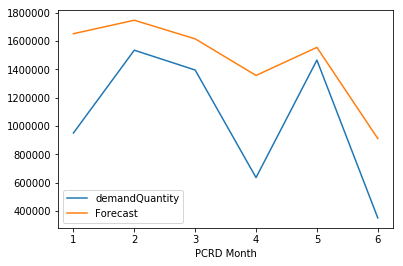

In [115]:
df_test[(df_test['customerParentID']==107652) & (df_test['forecastGroup']=='RF6110')].plot(x='PCRD Month',y=['demandQuantity','Forecast'])

In [116]:
df_test[(df_test['customerParentID']==107652) & (df_test['forecastGroup']=='RF6110')]

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,tdiff,mape
188957,107652,RF6110,2018,1,950000.0,3313600.0,12.345839,15.707869,15.233788,13.919962,...,19.562818,5.755742,1.609438,2,8.164430,-3.362030,1,1.651607e+06,-1,0.738534
188958,107652,RF6110,2018,2,1535000.0,5354080.0,11.225257,12.345839,15.707869,15.233788,...,19.562818,5.755742,1.609438,2,8.147845,-1.120582,1,1.746694e+06,0,0.137911
188959,107652,RF6110,2018,3,1395000.0,4817820.0,14.427990,11.225257,12.345839,15.707869,...,19.562818,5.755742,1.609438,2,8.486856,3.202734,1,1.615245e+06,1,0.157881
188960,107652,RF6110,2018,4,635000.0,2182495.0,13.655343,14.427990,11.225257,12.345839,...,19.562818,5.755742,1.609438,2,8.125595,-0.772647,1,1.356744e+06,2,1.136604
188961,107652,RF6110,2018,5,1465000.0,5035205.0,13.932405,13.655343,14.427990,11.225257,...,19.562818,5.755742,1.609438,2,8.400242,0.277062,1,1.555059e+06,3,0.061474
188962,107652,RF6110,2018,6,350000.0,1202950.0,14.446783,13.932405,13.655343,14.427990,...,19.562818,5.755742,1.609438,2,8.485118,0.514378,1,9.108366e+05,4,1.602390


In [117]:
df_pivot = df_pivot.replace([np.inf, -np.inf], np.nan)
df_pivot.to_csv("Forecast_with_lgbm_rf_prob.csv",encoding='utf-8', index=False)

In [118]:
model.best_iteration

372

In [119]:
df_test['Forecast'].value_counts()

0.000000e+00    19998
5.005433e+02       47
4.873132e+02       43
4.851230e+02       31
5.009975e+02       28
4.850655e+02       23
2.777762e+02       17
2.788704e+02       15
2.709925e+02       14
3.290414e+02       14
3.367497e+02       14
4.986273e+02       14
2.718066e+02       14
3.817369e+02       12
4.873038e+02       11
5.003612e+02       11
4.985870e+02       11
5.015815e+02       10
4.555063e+02        9
4.794977e+02        9
4.997302e+02        8
4.481629e+02        6
2.227421e+02        6
5.100811e+02        6
3.008469e+00        6
8.112308e+00        5
3.971853e+00        5
7.129423e+00        5
7.803572e+00        5
5.167431e+02        5
                ...  
1.640808e+02        1
5.107606e+03        1
8.970873e+04        1
2.660531e+03        1
8.502484e+03        1
1.220646e+03        1
1.358487e+06        1
2.830906e+03        1
1.744461e+05        1
4.804073e+03        1
1.701702e+05        1
9.030546e+00        1
3.935258e+04        1
4.145806e+02        1
1.453132e+

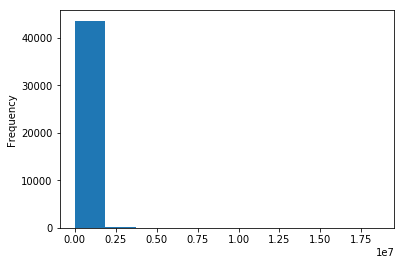

In [120]:
df_test['Forecast'].plot(kind='hist')

In [121]:
np.sort(df_test['Forecast'])

array([       0.        ,        0.        ,        0.        , ...,
       14458299.01008861, 14754659.47446061, 18585774.92914171])

In [122]:
#df_test[(df_test['customerParentID']==100083) & (df_test['forecastGroup']=='856020')].plot(x='PCRD Month',y=['demandQuantity','Forecast'])

In [123]:
df_test.to_csv("Forecast_ML.csv",encoding='utf-8', index=False)

In [124]:
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN,1
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.0,0
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,0.0,0
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,0.0,0
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1


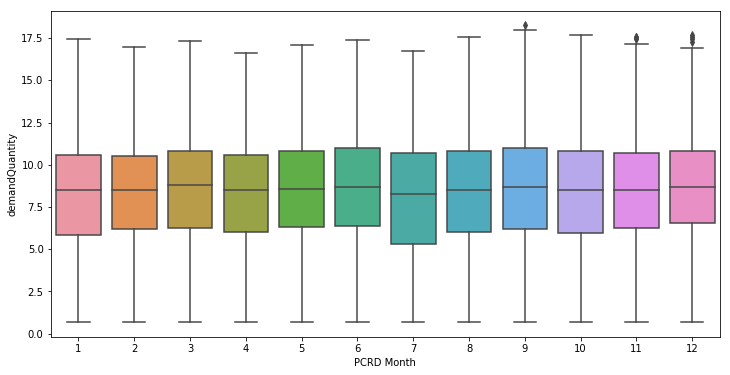

In [125]:
fig,axes = plt.subplots(figsize = (12,6))
sns.boxplot(data=df1.replace(0,np.NaN),x='PCRD Month',y='demandQuantity')

In [126]:
df1.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN,1
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.0,0
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,0.0,0
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,0.0,0
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1


In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189597 entries, 0 to 189596
Columns: 138 entries, customerParentID to demclass
dtypes: float64(107), int32(1), int64(28), object(2)
memory usage: 205.3+ MB


In [128]:
# construct a test set
z = df_test.groupby(['forecastGroup','PCRD Year','PCRD Month'],as_index=False)['demandQuantity','Forecast'].sum()

In [129]:
z.head(10)

,forecastGroup,PCRD Year,PCRD Month,demandQuantity,Forecast
0,1450,2018,1,7500.0,27751.039541
1,1450,2018,2,20000.0,28794.768670
2,1450,2018,3,15000.0,29517.975499
3,1450,2018,4,30000.0,28394.806780
4,1450,2018,5,17500.0,28470.280828
5,1450,2018,6,27500.0,31763.517038
6,1500100,2018,1,19300.0,9487.991123
7,1500100,2018,2,28850.0,9946.601941
8,1500100,2018,3,29050.0,9832.944917
9,1500100,2018,4,11500.0,10485.937361


In [130]:
z['absdiff']= abs(z['demandQuantity']-z['Forecast'])
z['mape']   = z['absdiff']/z['demandQuantity']
z           = z.replace([np.inf, -np.inf], np.nan)
m           = z.groupby(['PCRD Year','PCRD Month'],as_index=False)['absdiff','demandQuantity','Forecast'].sum()
m['mape']   = m['absdiff']/m['demandQuantity']
m['acc']    = m['Forecast']/m['demandQuantity']

In [131]:
z['absdiff'].sum()/z['demandQuantity'].sum()

0.5980457041912366

In [132]:
z['Forecast'].sum()/z['demandQuantity'].sum()

0.7158984692574613

In [133]:
m['mape'].mean()

0.603124913537712

In [134]:
m.head(6)

,PCRD Year,PCRD Month,absdiff,demandQuantity,Forecast,mape,acc
0,2018,1,2.133590e+08,421214183.0,3.871207e+08,0.506533,0.919059
1,2018,2,2.052133e+08,391251915.0,3.170862e+08,0.524504,0.810440
2,2018,3,3.732863e+08,605142658.0,3.208073e+08,0.616857,0.530135
3,2018,4,2.184857e+08,288666380.0,3.817842e+08,0.756880,1.322579
4,2018,5,3.284531e+08,573554082.0,3.227475e+08,0.572663,0.562715
5,2018,6,3.652873e+08,569592875.0,3.103511e+08,0.641313,0.544865


In [135]:
m['weight'] = m['demandQuantity']/m['demandQuantity'].sum()
m.head()

,PCRD Year,PCRD Month,absdiff,demandQuantity,Forecast,mape,acc,weight
0,2018,1,2.133590e+08,421214183.0,3.871207e+08,0.506533,0.919059,0.147824
1,2018,2,2.052133e+08,391251915.0,3.170862e+08,0.524504,0.810440,0.137309
2,2018,3,3.732863e+08,605142658.0,3.208073e+08,0.616857,0.530135,0.212374
3,2018,4,2.184857e+08,288666380.0,3.817842e+08,0.756880,1.322579,0.101307
4,2018,5,3.284531e+08,573554082.0,3.227475e+08,0.572663,0.562715,0.201288


In [136]:
m['wm'] = m['mape']*m['weight']
m['wm'].sum()

0.5980457041912368

In [137]:
z['mape'].mean()

293.1336912301704

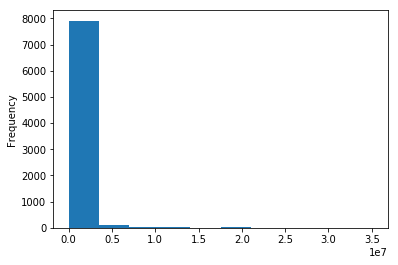

In [138]:
z['demandQuantity'].plot(kind='hist')

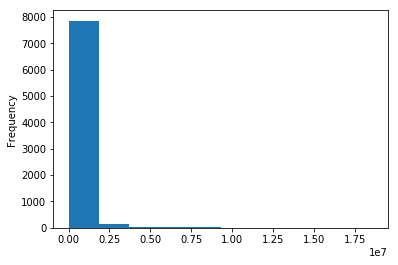

In [139]:
z['Forecast'].plot(kind='hist')

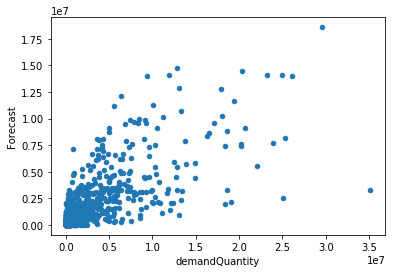

In [140]:
z.plot(kind='scatter',x='demandQuantity',y='Forecast')

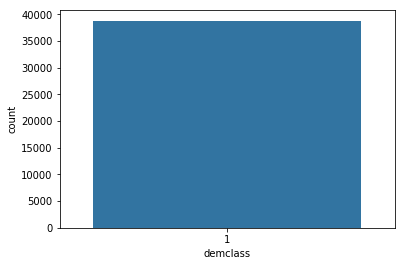

In [141]:
df_train['demclass'] = np.where(df_train['demandQuantity'] == 0 , 0,1)
sns.countplot(data = df_train,x = 'demclass')

### Final code

In [142]:
df_test['demandQuantity'] =  df_test['demandQuantity'].apply(pd.np.log1p)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
df_train.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN,1
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1
28,100083,856532,2016,7,8.517393,5450.0,0.0,NaN,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,7.979703,NaN,1
29,100083,856532,2016,8,8.517393,5450.0,0.0,0.0,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,8.328061,0.0,1
32,100083,856532,2016,11,9.615872,16350.0,0.0,0.0,0.0,0.0,...,4,23,196587.5,12.188868,3.178054,1.609438,8,8.366949,0.0,1


In [144]:
df_test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,tdiff,mape
16,100083,856020,2018,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.164430,0.0,0,0.0,-1,NaN
17,100083,856020,2018,2,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.147845,0.0,0,0.0,0,NaN
18,100083,856020,2018,3,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.486856,0.0,0,0.0,1,NaN
19,100083,856020,2018,4,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.125595,0.0,0,0.0,2,NaN
20,100083,856020,2018,5,7.601402,4600.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.400242,0.0,1,0.0,3,1.0


In [145]:
#splitting into test and train
df1['demclass']  = np.where(df1['demandQuantity']==0,0,1)
df_test          = df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([7,8,9,10,11,12]))]
df_train         = df1.drop(df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([7,8,9,10,11,12]))].index)
df_main_test     = df1[(df1['PCRD Year']==2018) & (df1['PCRD Month'].isin([7,8,9,10,11,12]))]
#df_train = df_train.drop(df_train[(df_train['PCRD Year']-df_train['Min Year']) * 12 + df_train['PCRD Month']-df_train['Min Month'] <0 ].index)
weights          = np.where(df_train['demandQuantity']==0,0,1)
#df_train = df_train.sample(frac=2.0,weights = weights,replace=True,random_state=42)
df_train = df_train[df_train['demandQuantity'] != 0]
X_train           = df_train.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
X_test            = df_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
X_main_test       = df_main_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year','PCRD Month'],axis=1)
y_train           = df_train[['demandQuantity']]
y_test            = df_test[['demandQuantity']]
X_test            = X_test.replace([np.inf, -np.inf], 0)
X_train           = X_train.replace([np.inf, -np.inf], 0)

In [146]:
df_test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
22,100083,856020,2018,7,NaN,NaN,0.000000,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1
23,100083,856020,2018,8,NaN,NaN,0.000000,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1
24,100083,856020,2018,9,NaN,NaN,0.000000,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1
25,100083,856020,2018,10,NaN,NaN,0.000000,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1
26,100083,856020,2018,11,NaN,NaN,7.601402,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1


In [147]:
df_train['demclass'].value_counts()

1    51115
Name: demclass, dtype: int64

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51115 entries, 0 to 189590
Columns: 138 entries, customerParentID to demclass
dtypes: float64(107), int32(1), int64(28), object(2)
memory usage: 54.0+ MB


In [149]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 22 to 189596
Columns: 138 entries, customerParentID to demclass
dtypes: float64(107), int32(1), int64(28), object(2)
memory usage: 48.0+ MB


In [150]:
#df_train[df_train['demandQuantity'] < 2.5]['dollars'].plot(kind='hist')

In [151]:
df_train[df_train['demandQuantity'] < 2.5]['forecastGroup'].nunique()

834

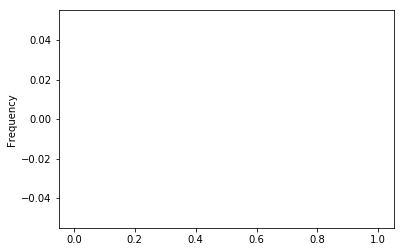

In [152]:
df_test['demandQuantity'].plot(kind='hist')

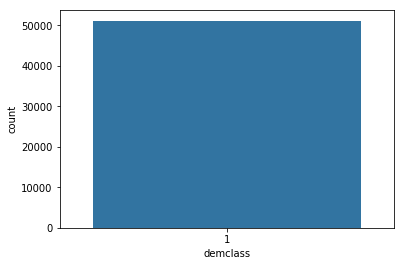

In [153]:
sns.countplot(data=df_train,x='demclass')

In [154]:
#eval functions
def smape(preds, target):
    '''
    Function to calculate SMAPE
    '''
#     n = len(target!=0)
#     masked_arr = ~(target==0) 
#     preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(target)
#     smape_val = 100 * np.median(num/denom)
    smape_val = 100 * np.sum(num)/np.sum(denom)
    return smape_val

def lgbm_smape(preds, train_data):
    '''
    Custom Evaluation Function for LGBM
    '''
    labels = train_data.get_label()
    smape_val = smape(np.expm1(preds), np.expm1(labels))
    return 'MAPE', smape_val, False

In [155]:
# import keras.backend as K
# def nnsmape(target, preds):
#     '''
#     Function to calculate SMAPE
#     '''
# #     n = len(target!=0)
# #     masked_arr = ~(target==0) 
# #     preds, target = preds[masked_arr], target[masked_arr]
#     preds = K.exp(preds - 1)
#     target= K.exp(target - 1)
#     num = K.abs(preds-target)
#     denom = K.abs(target)
# #     smape_val = 100 * np.median(num/denom)
#     smape_val = 100 * K.sum(num)/np.sum(denom)
#     return smape_val

In [156]:
d = df_train[['PCRD Year']].copy()
d.loc[d['PCRD Year']==2016,'y_category'] = 0.1
d.loc[d['PCRD Year']==2017,'y_category'] = 0.75
d.loc[d['PCRD Year']==2018,'y_category'] = 1

weights_Data = d['y_category']

In [157]:
d.head()

,PCRD Year,y_category
0,2016,0.10
4,2017,0.75
20,2018,1.00
28,2016,0.10
29,2016,0.10


In [158]:
df_train.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,NaN,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,NaN,1
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1
20,100083,856020,2018,5,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.400242,0.0,1
28,100083,856532,2016,7,8.517393,5450.0,0.0,NaN,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,7.979703,NaN,1
29,100083,856532,2016,8,8.517393,5450.0,0.0,0.0,NaN,NaN,...,4,23,196587.5,12.188868,3.178054,1.609438,8,8.328061,0.0,1


In [159]:
df2_ridge = df1.copy()
df2_ridge = df2_ridge.replace([np.inf, -np.inf], np.nan)
df2_ridge.fillna(0,inplace=True)

#df_knn_train=df2_knn.drop(df2_knn[(df2_knn['PCRD Year']==2018) & (df2_knn['PCRD Month'].isin([3,4,5,6,7,8]))].index)

df_ridge_test  = df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([7,8,9,10,11,12]))]
df_ridge_train = df2_ridge.drop(df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([7,8,9,10,11,12]))].index)
df_ridge_main_test = df2_ridge[(df2_ridge['PCRD Year']==2018) & (df2_ridge['PCRD Month'].isin([7,8,9,10,11,12]))]

df_ridge_train.head()

X_train_ridge       = df_ridge_train.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
X_test_ridge        = df_ridge_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
X_main_test_ridge   = df_ridge_test.drop(['customerParentID','forecastGroup','demandQuantity','demclass','dollars','buckets','Min Year', 'Min Month','PCRD Year'],axis=1)
y_train_ridge       = df_ridge_train[['demandQuantity']]
y_test_ridge        = df_ridge_test[['demandQuantity']]

y_train_ridge_class  = df_ridge_train[['demclass']]
y_test_ridge_class   = df_ridge_test[['demclass']]


In [160]:
df_ridge_test[cols]

,forecastquantity_bu,forecastquantity_sales,forecastquantity_mp,forecastquantity_idp,nzinterval,zerocum,maxdiff,maxdiff1,deltamean
22,0.000000,0.000000,0.000000,0.000000,4.0,12.0,20,7,203.333333
23,0.000000,0.000000,0.000000,0.000000,4.0,13.0,20,7,203.333333
24,0.000000,0.000000,0.000000,0.000000,4.0,14.0,20,7,203.333333
25,0.000000,0.000000,0.000000,0.000000,4.0,15.0,20,7,203.333333
26,0.000000,0.000000,0.000000,0.000000,16.0,0.0,20,7,203.333333
27,0.000000,0.000000,0.000000,0.000000,16.0,1.0,20,7,203.333333
52,8.741456,7.562681,8.741456,8.741456,6.0,2.0,23,6,57.750000
53,8.466531,7.340187,8.466531,8.466531,6.0,3.0,23,6,57.750000
54,8.292298,7.337588,8.292298,8.292298,6.0,4.0,23,6,57.750000
55,8.740977,8.255309,8.740977,8.740977,6.0,5.0,23,6,57.750000


In [161]:
df_ridge_train.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,recency_y,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass
0,100083,856020,2016,9,9.210440,159080.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.0,1
1,100083,856020,2016,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.0,0
2,100083,856020,2016,11,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,0.0,0
3,100083,856020,2016,12,0.000000,0.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,0.0,0
4,100083,856020,2017,1,7.601402,4600.0,0.0,0.0,0.0,0.0,...,36,3,172880.0,12.060359,1.386294,3.610918,2,8.164430,0.0,1


In [162]:
y_test_ridge_class

,demclass
22,1
23,1
24,1
25,1
26,1
27,1
52,1
53,1
54,1
55,1


In [163]:
X_train_ridge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144165 entries, 0 to 189590
Columns: 129 entries, PCRD Month to Last_month_Diff
dtypes: float64(105), int64(24)
memory usage: 143.0 MB


In [164]:
cols = ['demandQuantitybothWmean', 'demandQuantitybothQmedian',
       'demandQuantitybothWmedian', 'demandQuantitybothQmean',
       'demandQuantitybothQmin', 'prodrelasetimediff','maxdiff2',
       'mindiff','change_in_ordermean', 'demandQuantitybothWmin',
       'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
       'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
       'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
       'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
       'forecastquantity_bu',
       'lag_15','change_in_dollarsmean','demandQuantitybothQstd', 'demandQuantitybothQmax',
       'demandQuantitybothWstd', 'fickledollar', 'lag_18','zerocum','leadTimestd','lag_12','maxdiff','maxdiff1']

cols = ['forecastquantity_bu','forecastquantity_sales','forecastquantity_mp','forecastquantity_idp','maxdiff','mindiff','fickleorder','kickofftimediff','ewm_0.1','lag_6']

In [165]:
X_train = X_train[cols]

X_test = X_test[cols]

# X_train = X_train[['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'mindiff', 'prodrelasetimediff',
#        'maxdiff', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity']]

# X_test = X_test[['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'mindiff', 'prodrelasetimediff',
#        'maxdiff', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity']]

In [166]:
# X_train = X_train[['demandQuantitybothWmean', 'demandQuantitybothQmean',
#         'demandQuantitybothWmedian', 'demandQuantitybothQmedian',
#        'mindiff', 'prodrelasetimediff', 'change_in_ordermean',
#        'demandQuantitybothQstd', 'maxdiff', 'fickleorder',
#        'demandQuantitybothQmin', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'kickofftimediff',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'demandQuantitybothWmin',
#        'change_in_dollarsmean', 'deltamedian', 'lag_15', 'cov_both',
#        'lag_11', 'ewm_0.1', 'fickledollar', 'roll_mean_9', 'deltamean',
#        'pricestd', 'lag_9', 'lag_18', 'change_in_ordermin',
#        'roll_median_9', 'demandQuantitybothWmax', 'lag_10', 'lag_12',
#        'roll_mean_7', 'deltastd', 'nzinterval', 'lag_8','forecastquantity']]

# X_test  = X_test[['demandQuantitybothWmean', 'demandQuantitybothQmean',
#         'demandQuantitybothWmedian', 'demandQuantitybothQmedian',
#        'mindiff', 'prodrelasetimediff', 'change_in_ordermean',
#        'demandQuantitybothQstd', 'maxdiff', 'fickleorder',
#        'demandQuantitybothQmin', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'kickofftimediff',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'demandQuantitybothWmin',
#        'change_in_dollarsmean', 'deltamedian', 'lag_15', 'cov_both',
#        'lag_11', 'ewm_0.1', 'fickledollar', 'roll_mean_9', 'deltamean',
#        'pricestd', 'lag_9', 'lag_18', 'change_in_ordermin',
#        'roll_median_9', 'demandQuantitybothWmax', 'lag_10', 'lag_12',
#        'roll_mean_7', 'deltastd', 'nzinterval', 'lag_8','forecastquantity']]

# X_train.head()

In [167]:

#weights_Data = 1-((2018-df_train['PCRD Year']))**(2018-df_train['PCRD Year'])*0.1
cols = [col for col in X_train.columns]
import lightgbm as lgb
params = {'task':'train', 'boosting_type':'gbdt', 'objective':'regression', 
              'metric': {'mse'}, 'num_leaves': 500, 'learning_rate': 0.01, 
              'feature_fraction': 0.85, 'max_depth': 9, 'verbose': 0, 
              'num_boost_round':9000, 'nthread':-1}
lgbtrain = lgb.Dataset(data=X_train.values, label=y_train['demandQuantity'].values,feature_name=cols)#,weight = weights)


evals_result = {}
model3 = lgb.train(params, lgbtrain,num_boost_round=model.best_iteration, 
                       feval=lgbm_smape,
                      verbose_eval=200)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\lightgbm\engine.py:102: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [168]:
print("Features importance...")

gain     = model3.feature_importance('gain')
feat_imp = pd.DataFrame({'feature':model3.feature_name(), 
                         'split':model3.feature_importance('split'), 
                         'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

print('Top 25 features:\n', feat_imp.head(60))

Features importance...
Top 25 features:
                   feature       gain   split
1  forecastquantity_sales  26.829763   47857
8                 ewm_0.1  20.845334  105534
6             fickleorder  13.410604  193748
5                 mindiff  10.118097   84552
7         kickofftimediff   9.933278  196142
4                 maxdiff   8.100688  127252
0     forecastquantity_bu   6.017918   27391
9                   lag_6   3.729247   55453
2     forecastquantity_mp   0.573188   33699
3    forecastquantity_idp   0.441884   30398


In [169]:
feat_imp['feature'].head(60).values

array(['forecastquantity_sales', 'ewm_0.1', 'fickleorder', 'mindiff',
       'kickofftimediff', 'maxdiff', 'forecastquantity_bu', 'lag_6',
       'forecastquantity_mp', 'forecastquantity_idp'], dtype=object)

In [170]:
#df_test.to_csv("Forecast_ML.csv",encoding='utf-8', index=False)

In [171]:
class_weight = {0: 5, 1: 30}

In [172]:
cols = ['lag_6','nzinterval','zerocum','nonzerocum','mindiff','maxdiff','deltamean','demandQuantitybothWmean','forecastclass'] 
cols = ['maxdiff', 'deltamean', 'deltastd', 'mindiff', 'deltamax',
       'PCRD_Monthmean', 'maxdiff1', 'Last_month_Diff', 'deltamedian',
       'lag_18', 'lag_15', 'deltamin', 'Max Year', 'lag_12', 'Season',
       'zerocum', 'mindiff1', 'lag_11', 'diff_betw_lasttwo_nonzeros',
       'lag_9', 'ewm_0.9', 'roll_median_9', 'ewm_0.1', 'roll_mean_2',
       'Max Month', 'nzinterval', 'demandQuantitybothQmin', 'lag_7',
       'recency_x', 'leadTimemin', 'roll_mean_3', 'roll_mean_7',
       'demandQuantitybothWmin', 'roll_mean_5', 'lag_6', 'lag_8',
       'roll_mean_9', 'leadTimemax', 'demandQuantitybothQstd',
       'roll_median_4']
cols = ['maxdiff', 'deltamean', 'deltastd', 'mindiff', 'deltamax',
       'PCRD_Monthmean', 'maxdiff1', 'Last_month_Diff', 'deltamedian']
cols = ['lag_6','nzinterval','zerocum','maxdiff','maxdiff1','mindiff1','deltamean','demandQuantitybothQstd','PCRD_Monthmean','roll_mean_9','change_in_ordermin','ewm_0.1','deltamedian','lag_11','lag_18','lag_15']
cols = ['forecastquantity_bu','forecastquantity_sales','forecastquantity_mp','forecastquantity_idp','nzinterval','zerocum','maxdiff','maxdiff1','deltamean']

In [173]:
# cols = ['demandQuantitybothWmean', 'demandQuantitybothQmedian',
#        'demandQuantitybothWmedian', 'demandQuantitybothQmean',
#        'demandQuantitybothQmin', 'prodrelasetimediff',
#        'mindiff1', 'change_in_ordermean', 'demandQuantitybothWmin',
#        'fickleorder', 'kickofftimediff', 'pricestd', 'ewm_0.1',
#        'diff_betw_lasttwo_nonzeros', 'PCRD_Monthmean', 'cov_bothq',
#        'Last_month_Diff', 'cov_both', 'roll_mean_9', 'lag_11',
#        'deltamean', 'lag_9', 'change_in_ordermin', 'deltamedian',
#        'forecastquantity_bu','forecastquantity_sales','forecastquantity_mp',
#        'lag_15','change_in_dollarsmean','demandQuantitybothQstd', 'demandQuantitybothQmax',
#        'demandQuantitybothWstd', 'fickledollar', 'lag_18','zerocum','leadTimestd','lag_12','maxdiff','maxdiff1']

In [174]:
X_train_ridge_1 = X_train_ridge[cols].copy()
X_test_ridge_1  = X_test_ridge[cols].copy()

In [175]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_features=0.75,max_depth=9,random_state=42,class_weight=class_weight)
clf.fit(X_train_ridge_1.values,y_train_ridge_class['demclass'].values)

RandomForestClassifier(bootstrap=True, class_weight={0: 5, 1: 30},
            criterion='gini', max_depth=9, max_features=0.75,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [176]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_train_ridge_1.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.head(25)

,Gini-importance
maxdiff1,0.243374
zerocum,0.238500
deltamean,0.206147
maxdiff,0.175578
nzinterval,0.107179
forecastquantity_idp,0.015073
forecastquantity_mp,0.005565
forecastquantity_bu,0.004414
forecastquantity_sales,0.004173


In [177]:
# cols = [col for col in X_train_ridge_1.columns]
# import lightgbm as lgb
# params = {'task':'train', 'boosting_type':'gbdt', 'objective':'binary', 
#               'metric': 'binary_logloss', 'num_leaves': 31, 'learning_rate': 0.01, 
#               'feature_fraction': 0.85, 'max_depth': 9, 'verbose': 0, 
#               'num_boost_round':9000, 'nthread':-1,'scale_pos_weight' : 4}
# lgbtrain = lgb.Dataset(data=X_train_ridge_1.values, label=y_train_ridge_class['demclass'].values,feature_name=cols)


# evals_result = {}
# model2 = lgb.train(params, lgbtrain,num_boost_round=model1.best_iteration, 
#                       verbose_eval=200)

In [178]:
# print("Features importance...")

# gain     = model2.feature_importance('gain')
# feat_imp = pd.DataFrame({'feature':model2.feature_name(), 
#                          'split':model2.feature_importance('split'), 
#                          'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

# print('Top 25 features:\n', feat_imp.head(60))

In [179]:
pred_Y_val  = clf.predict(X_test_ridge_1.values) 
#pred_Y_val  = 1
#pred_Y_val  = np.where(pred_Y_val > 0.5,1,0)
pred_Y_val1 = model3.predict(X_test.values, num_iteration=model.best_iteration)
pred_Y_val1 = np.expm1(pred_Y_val1)
#Y_val       = df_test['demandQuantity'].values
#Y_val       = df_ridge_test['demclass'].values
val_df     = pd.DataFrame(columns=['pred_Y_val','pred_Y_val1'])

val_df['pred_Y_val1'] = pred_Y_val1
val_df['pred_Y_val']  = pred_Y_val
pred_Y_val            = val_df['pred_Y_val'] * val_df['pred_Y_val1']
print(val_df.shape)
print(val_df.sample(5))

(45432, 2)
       pred_Y_val    pred_Y_val1
12759           1  162369.703903
42436           0      42.336378
6033            0       5.806541
21432           0      21.840485
33919           0      23.240742


In [180]:
val_df['pred_Y_val'] * val_df['pred_Y_val1']

0           130.691388
1           134.929956
2           134.730970
3            64.044340
4            96.079640
5            73.208992
6          4622.062399
7          4997.065751
8          4686.381328
9          4371.756925
10         3739.797670
11         4402.678361
12        10765.752898
13        10252.149643
14        10371.929553
15         9851.226946
16         8892.075070
17         9403.322281
18        11299.991602
19        11359.585361
20        10242.491012
21        10111.928834
22        11430.903755
23        11516.895288
24        10060.195131
25        10415.649366
26        12204.512104
27        10660.744669
28        11050.006375
29        12224.151715
             ...      
45402    127455.465455
45403    133485.753247
45404    147745.061392
45405    191486.883022
45406    155136.713467
45407     79693.056429
45408     48575.452420
45409     53041.258988
45410    109907.640038
45411    127274.993725
45412    126914.950506
45413     59952.814790
45414     4

In [181]:
pred_Y_val

0           130.691388
1           134.929956
2           134.730970
3            64.044340
4            96.079640
5            73.208992
6          4622.062399
7          4997.065751
8          4686.381328
9          4371.756925
10         3739.797670
11         4402.678361
12        10765.752898
13        10252.149643
14        10371.929553
15         9851.226946
16         8892.075070
17         9403.322281
18        11299.991602
19        11359.585361
20        10242.491012
21        10111.928834
22        11430.903755
23        11516.895288
24        10060.195131
25        10415.649366
26        12204.512104
27        10660.744669
28        11050.006375
29        12224.151715
             ...      
45402    127455.465455
45403    133485.753247
45404    147745.061392
45405    191486.883022
45406    155136.713467
45407     79693.056429
45408     48575.452420
45409     53041.258988
45410    109907.640038
45411    127274.993725
45412    126914.950506
45413     59952.814790
45414     4

In [182]:
df_test['Forecast'] = pred_Y_val.values
#df_test['Forecast']=np.expm1(df_test['Forecast'].values)
#df_test['demandQuantity']=np.expm1(df_test['demandQuantity'].values)
#df_test['demandQuantity']=df_test['demandQuantity'].values

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
# pred_Y_val  = model1.predict(X_test_scaled)
# Y_val       = df_ridge_test['demclass'].values

In [184]:
weights_Data = 1-((2018-df_train['PCRD Year']))**(2018-df_train['PCRD Year'])*0.1

In [185]:
weights_Data

0         0.6
4         0.9
20        0.9
28        0.6
29        0.6
32        0.6
33        0.6
34        0.9
36        0.9
37        0.9
38        0.9
44        0.9
51        0.9
58        0.6
59        0.6
60        0.6
61        0.6
62        0.6
63        0.6
64        0.6
65        0.6
66        0.9
67        0.9
68        0.9
70        0.9
71        0.9
74        0.9
75        0.9
76        0.9
82        0.9
         ... 
189520    0.9
189528    0.9
189529    0.9
189530    0.9
189531    0.9
189538    0.9
189539    0.9
189540    0.9
189541    0.9
189542    0.9
189549    0.9
189550    0.9
189551    0.9
189552    0.9
189553    0.9
189554    0.9
189555    0.9
189556    0.9
189557    0.9
189565    0.9
189566    0.9
189567    0.9
189568    0.9
189569    0.9
189581    0.9
189584    0.9
189585    0.9
189586    0.9
189589    0.9
189590    0.9
Name: PCRD Year, Length: 51115, dtype: float64

In [186]:
df_test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast
22,100083,856020,2018,7,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388
23,100083,856020,2018,8,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956
24,100083,856020,2018,9,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970
25,100083,856020,2018,10,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340
26,100083,856020,2018,11,NaN,NaN,7.601402,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


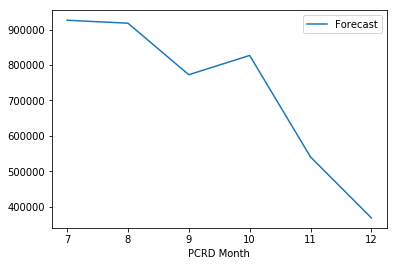

In [187]:
df_test[(df_test['customerParentID']==107652) & (df_test['forecastGroup']=='RF6110')].plot(x='PCRD Month',y=['Forecast'])

In [188]:
test = pd.read_csv("TestData.csv")
test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars
0,100083,1450,2018,7,0.0,0.0
1,100083,1450,2018,8,0.0,0.0
2,100083,1450,2018,9,0.0,0.0
3,100083,1450,2018,10,0.0,0.0
4,100083,1450,2018,11,0.0,0.0


In [189]:
df_test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast
22,100083,856020,2018,7,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388
23,100083,856020,2018,8,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956
24,100083,856020,2018,9,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970
25,100083,856020,2018,10,NaN,NaN,0.000000,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340
26,100083,856020,2018,11,NaN,NaN,7.601402,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640


In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 22 to 189596
Columns: 139 entries, customerParentID to Forecast
dtypes: float64(108), int32(1), int64(28), object(2)
memory usage: 48.4+ MB


In [191]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 2 columns):
pred_Y_val     45432 non-null int64
pred_Y_val1    45432 non-null float64
dtypes: float64(1), int64(1)
memory usage: 710.0 KB


In [192]:
df_test['c']=df_test['customerParentID'].astype(str) + '-' + df_test['forecastGroup']

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [193]:
df_test.head(10)

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,lag_6,lag_7,lag_8,lag_9,...,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,c
22,100083,856020,2018,7,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388,100083-856020
23,100083,856020,2018,8,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956,100083-856020
24,100083,856020,2018,9,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970,100083-856020
25,100083,856020,2018,10,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340,100083-856020
26,100083,856020,2018,11,NaN,NaN,7.601402,0.000000,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640,100083-856020
27,100083,856020,2018,12,NaN,NaN,0.000000,7.601402,0.000000,0.000000,...,172880.0,12.060359,1.386294,3.610918,2,8.487322,-7.601402,1,73.208992,100083-856020
52,100083,856532,2018,7,NaN,NaN,0.000000,0.000000,8.517393,0.000000,...,196587.5,12.188868,3.178054,1.609438,8,7.979703,0.000000,1,4622.062399,100083-856532
53,100083,856532,2018,8,NaN,NaN,0.000000,0.000000,0.000000,8.517393,...,196587.5,12.188868,3.178054,1.609438,8,8.328061,0.000000,1,4997.065751,100083-856532
54,100083,856532,2018,9,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,196587.5,12.188868,3.178054,1.609438,8,8.539813,0.000000,1,4686.381328,100083-856532
55,100083,856532,2018,10,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,196587.5,12.188868,3.178054,1.609438,8,8.264596,0.000000,1,4371.756925,100083-856532


In [194]:
test['c']= test['customerParentID'].astype(str) + '-' + test['forecastGroup']
test     = test[test['c'].isin(df_test['c'])]

In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41760 entries, 234 to 606911
Data columns (total 7 columns):
customerParentID    41760 non-null int64
forecastGroup       41760 non-null object
PCRD Year           41760 non-null int64
PCRD Month          41760 non-null int64
demandQuantity      41760 non-null float64
dollars             41760 non-null float64
c                   41760 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 2.5+ MB


In [196]:
test.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars,c
234,100083,856020,2018,7,0.0,0.0,100083-856020
235,100083,856020,2018,8,0.0,0.0,100083-856020
236,100083,856020,2018,9,0.0,0.0,100083-856020
237,100083,856020,2018,10,0.0,0.0,100083-856020
238,100083,856020,2018,11,0.0,0.0,100083-856020


In [197]:
test=test.sort_values(by =['customerParentID','forecastGroup','PCRD Year','PCRD Month'])

In [198]:
test.drop('c',axis = 1,inplace=True)
df_test.drop('c',axis = 1,inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [199]:
test = test.reset_index(drop=True)
test.head(10)


,customerParentID,forecastGroup,PCRD Year,PCRD Month,demandQuantity,dollars
0,100083,856020,2018,7,0.0,0.0
1,100083,856020,2018,8,0.0,0.0
2,100083,856020,2018,9,0.0,0.0
3,100083,856020,2018,10,0.0,0.0
4,100083,856020,2018,11,0.0,0.0
5,100083,856020,2018,12,0.0,0.0
6,100083,856532,2018,7,10000.0,9300.0
7,100083,856532,2018,8,5000.0,4650.0
8,100083,856532,2018,9,5000.0,4650.0
9,100083,856532,2018,10,0.0,0.0


In [200]:
df_test['customerParentID'].nunique()

86

In [201]:
test['customerParentID'].nunique()

83

In [202]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41760 entries, 0 to 41759
Data columns (total 6 columns):
customerParentID    41760 non-null int64
forecastGroup       41760 non-null object
PCRD Year           41760 non-null int64
PCRD Month          41760 non-null int64
demandQuantity      41760 non-null float64
dollars             41760 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.9+ MB


In [203]:
df_test.drop(['demandQuantity','dollars'],axis=1,inplace=True)
df_test.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast
22,100083,856020,2018,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388
23,100083,856020,2018,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956
24,100083,856020,2018,9,0.000000,0.0,0.0,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970
25,100083,856020,2018,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340
26,100083,856020,2018,11,7.601402,0.0,0.0,0.0,0.0,0.0,...,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640


In [204]:
df_test = df_test.reset_index(drop=True)
df_test.head(10)


,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,frequency_y,monetary_value_y,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast
0,100083,856020,2018,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388
1,100083,856020,2018,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956
2,100083,856020,2018,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970
3,100083,856020,2018,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340
4,100083,856020,2018,11,7.601402,0.000000,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640
5,100083,856020,2018,12,0.000000,7.601402,0.000000,0.000000,0.000000,0.000000,...,3,172880.0,12.060359,1.386294,3.610918,2,8.487322,-7.601402,1,73.208992
6,100083,856532,2018,7,0.000000,0.000000,8.517393,0.000000,0.000000,0.000000,...,23,196587.5,12.188868,3.178054,1.609438,8,7.979703,0.000000,1,4622.062399
7,100083,856532,2018,8,0.000000,0.000000,0.000000,8.517393,0.000000,0.000000,...,23,196587.5,12.188868,3.178054,1.609438,8,8.328061,0.000000,1,4997.065751
8,100083,856532,2018,9,0.000000,0.000000,0.000000,0.000000,8.517393,0.000000,...,23,196587.5,12.188868,3.178054,1.609438,8,8.539813,0.000000,1,4686.381328
9,100083,856532,2018,10,0.000000,0.000000,0.000000,0.000000,0.000000,8.517393,...,23,196587.5,12.188868,3.178054,1.609438,8,8.264596,0.000000,1,4371.756925


In [205]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Columns: 137 entries, customerParentID to Forecast
dtypes: float64(106), int32(1), int64(28), object(2)
memory usage: 47.3+ MB


In [206]:
df_test_combined = pd.merge(df_test,test,how='left',on= ['customerParentID','forecastGroup','PCRD Year','PCRD Month'])
df_test_combined.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,demandQuantity,dollars
0,100083,856020,2018,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388,0.0,0.0
1,100083,856020,2018,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956,0.0,0.0
2,100083,856020,2018,9,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970,0.0,0.0
3,100083,856020,2018,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340,0.0,0.0
4,100083,856020,2018,11,7.601402,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640,0.0,0.0


In [207]:
df_test_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45432 entries, 0 to 45431
Columns: 139 entries, customerParentID to dollars
dtypes: float64(108), int32(1), int64(28), object(2)
memory usage: 48.4+ MB


In [208]:
df_test_combined.loc[:,'demandQuantity'].fillna(0,inplace = True)
df_test_combined.loc[:,'dollars'].fillna(0,inplace = True)
df_test_combined.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,demandQuantity,dollars
0,100083,856020,2018,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388,0.0,0.0
1,100083,856020,2018,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956,0.0,0.0
2,100083,856020,2018,9,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970,0.0,0.0
3,100083,856020,2018,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340,0.0,0.0
4,100083,856020,2018,11,7.601402,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640,0.0,0.0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


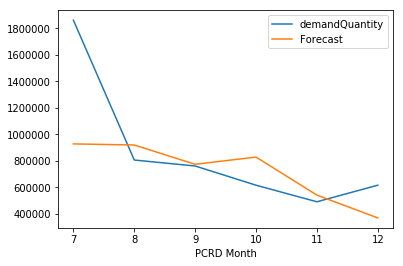

In [209]:
df_test_combined[(df_test_combined['customerParentID']==107652) & (df_test_combined['forecastGroup']=='RF6110')].plot(x='PCRD Month',y=['demandQuantity','Forecast'])

In [210]:
#df_test_combined = df_test_combined[df_test_combined['PCRD Month'] != 12]
df_test_combined = df_test_combined.reset_index(drop = True)
df_test_combined.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,demandQuantity,dollars
0,100083,856020,2018,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,7.979703,0.000000,1,130.691388,0.0,0.0
1,100083,856020,2018,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.328061,0.000000,1,134.929956,0.0,0.0
2,100083,856020,2018,9,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.539813,0.000000,1,134.730970,0.0,0.0
3,100083,856020,2018,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.264596,0.000000,1,64.044340,0.0,0.0
4,100083,856020,2018,11,7.601402,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.366949,7.601402,1,96.079640,0.0,0.0


In [211]:
# construct a test set
z = df_test_combined.groupby(['forecastGroup','PCRD Year','PCRD Month'],as_index=False)['demandQuantity','Forecast'].sum()

In [212]:
z.head(10)

,forecastGroup,PCRD Year,PCRD Month,demandQuantity,Forecast
0,1450,2018,7,10000.0,29349.260792
1,1450,2018,8,52500.0,27823.328361
2,1450,2018,9,10000.0,28812.833914
3,1450,2018,10,12500.0,34676.684307
4,1450,2018,11,0.0,28915.616068
5,1450,2018,12,0.0,33935.691645
6,1500100,2018,7,21150.0,15100.216137
7,1500100,2018,8,36000.0,15413.684909
8,1500100,2018,9,24400.0,18542.181964
9,1500100,2018,10,67450.0,15048.413347


In [213]:
#z = z[(z['PCRD Year'] == 2018) & (z['PCRD Month'] == 12)]

In [214]:
z['absdiff']= abs(z['demandQuantity']-z['Forecast'])
z['mape']   = z['absdiff']/z['demandQuantity']
z           = z.replace([np.inf, -np.inf], np.nan)
m           = z.groupby(['PCRD Year','PCRD Month'],as_index=False)['absdiff','demandQuantity','Forecast'].sum()
m['mape']   = m['absdiff']/m['demandQuantity']
m['acc']    = m['Forecast']/m['demandQuantity']

In [215]:
z['absdiff'].sum()/z['demandQuantity'].sum()

0.6292409768003955

In [216]:
z['Forecast'].sum()/z['demandQuantity'].sum()

0.549202948046574

In [217]:
m['mape'].mean()

0.6273495011510133

In [218]:
m.head()

,PCRD Year,PCRD Month,absdiff,demandQuantity,Forecast,mape,acc
0,2018,7,4.641210e+08,684469180.0,3.315295e+08,0.678074,0.484360
1,2018,8,4.419437e+08,668272940.0,3.136264e+08,0.661322,0.469309
2,2018,9,4.934821e+08,775645158.0,3.638538e+08,0.636221,0.469098
3,2018,10,3.449253e+08,603312654.0,4.039410e+08,0.571719,0.669538
4,2018,11,3.499595e+08,582577320.0,4.008508e+08,0.600709,0.688065


In [219]:
df.head()

,orderNumber,orderLine,material,orderDate,PCRD,forecastGroup,customerParentID,demandQuantity,dollars,forecastGroup.1,pdpStage,pdpKickoffDate,pdpProdReleaseDate,marketSubgroup,businessGroup,businessUnitShort,productLineDesc,vcMarketingManager,vcProductManager
0,1163546,100,QM56022TR13-5K,2018-01-16,2018-01-16,QM56022,102572,-2392930.0,-2251747.13,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
1,1170176,11,QM56022TR13-5K,2018-02-12,2018-02-12,QM56022,102572,-1230000.0,-1157430.00,QM56022,PD6,20160330.0,20170630.0,4G/RF Flex,MP,RF BU,RF Solutions PL,Stewart Copenhaver,Ashok Bhupathiraju
2,60016739,10,QM14003TR13-5KSAM,2016-08-25,2016-08-25,QM14003,100099,-874602.0,-95331.62,QM14003,PD7,20150805.0,20151221.0,LNA,MP,DS BU,Discrete Solutions PL,Sarang Kayande,MingYuan Zhao
3,1126061,30,1115069,2017-10-24,2017-10-24,885075,102572,-621243.0,-129839.79,885075,PD6,20140415.0,20150326.0,Advanced Filtering,MP,DS BU,Discrete Solutions PL,Scott Baisey,Chris Scott
4,60020838,10,RF1630TR13,2018-04-19,2018-04-19,RF1630,105758,-490000.0,-55860.00,RF1630,PD6,20130417.0,20130918.0,Discrete Switch,MP,DS BU,Discrete Solutions PL,Sarang Kayande,Shaune Reynolds


In [220]:
df['PCRD'].max()

Timestamp('2018-06-30 00:00:00')

In [221]:
df_test['Forecast'].value_counts()

0.000000         23701
31.592987            9
36.377343            6
40.986196            6
6.774609             5
8.486434             5
35.812329            5
20.619926            5
18.315699            5
2051.675203          5
13.063878            5
50.403024            4
62.465076            4
181.279008           4
53.849959            4
219.627092           4
11.640233            4
6.997433             4
48.809486            4
9.508004             4
10.581956            4
2.411390             4
4.753180             4
5.579925             4
19.635732            4
31.136359            4
111.899058           4
61.014112            4
35.250285            3
14.039505            3
                 ...  
6314.359502          1
15635.512296         1
16.934483            1
3337.449721          1
17.912538            1
2903.250718          1
5.222684             1
6809.875627          1
3.657420             1
3097.734489          1
14767.042890         1
29621.268144         1
919.317141 

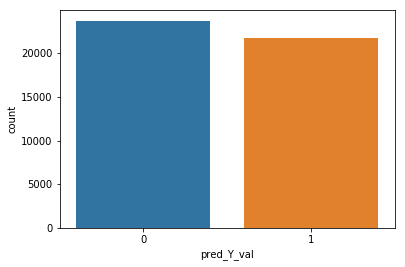

In [222]:
sns.countplot(data = val_df,x = 'pred_Y_val')

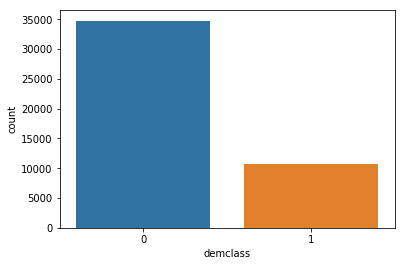

In [223]:
df_test_combined['demclass'] = np.where(df_test_combined['demandQuantity'] == 0 , 0,1)
sns.countplot(data = df_test_combined,x = 'demclass')

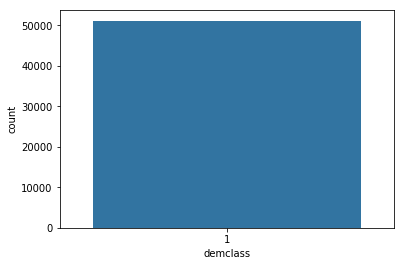

In [224]:
df_train['demclass'] = np.where(df_train['demandQuantity'] == 0 , 0,1)
sns.countplot(data = df_train,x = 'demclass')

In [225]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
print(accuracy_score(df_test_combined['demclass'].values,np.where(df_test_combined['Forecast'] ==0 ,0,1)))
print(recall_score(df_test_combined['demclass'].values,np.where(df_test_combined['Forecast'] ==0 ,0,1),average='macro'))
print(f1_score(df_test_combined['demclass'].values,np.where(df_test_combined['Forecast'] ==0 ,0,1),average='macro'))

0.6922653636203557
0.7512780202730021
0.6647436748984858


In [226]:
from sklearn.metrics import classification_report
print(classification_report(df_test_combined['demclass'].values,np.where(df_test_combined['Forecast'] ==0 ,0,1)))

             precision    recall  f1-score   support

          0       0.94      0.64      0.76     34748
          1       0.42      0.86      0.57     10684

avg / total       0.82      0.69      0.72     45432



In [227]:
df_test_combined['demclass']

0        0
1        0
2        0
3        0
4        0
5        0
6        1
7        1
8        1
9        0
10       0
11       0
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
45402    1
45403    1
45404    1
45405    1
45406    1
45407    0
45408    1
45409    1
45410    1
45411    1
45412    0
45413    0
45414    1
45415    1
45416    1
45417    1
45418    1
45419    1
45420    0
45421    0
45422    0
45423    1
45424    0
45425    0
45426    1
45427    1
45428    1
45429    1
45430    1
45431    1
Name: demclass, Length: 45432, dtype: int32

In [228]:
val_df['pred_Y_val']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
45402    1
45403    1
45404    1
45405    1
45406    1
45407    1
45408    1
45409    1
45410    1
45411    1
45412    1
45413    1
45414    1
45415    1
45416    1
45417    1
45418    1
45419    1
45420    0
45421    0
45422    0
45423    0
45424    0
45425    0
45426    1
45427    1
45428    1
45429    1
45430    1
45431    1
Name: pred_Y_val, Length: 45432, dtype: int64

In [229]:
df_test_combined.head()

,customerParentID,forecastGroup,PCRD Year,PCRD Month,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,...,logm_y,logf_y,logr_y,count_of_cus,PCRD_Monthmean,Last_month_Diff,demclass,Forecast,demandQuantity,dollars
0,100083,856020,2018,7,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,7.979703,0.000000,0,130.691388,0.0,0.0
1,100083,856020,2018,8,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.328061,0.000000,0,134.929956,0.0,0.0
2,100083,856020,2018,9,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.539813,0.000000,0,134.730970,0.0,0.0
3,100083,856020,2018,10,0.000000,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.264596,0.000000,0,64.044340,0.0,0.0
4,100083,856020,2018,11,7.601402,0.0,0.0,0.0,0.0,0.0,...,12.060359,1.386294,3.610918,2,8.366949,7.601402,0,96.079640,0.0,0.0


In [230]:
df_test_combined['forecastquantity_bu'] = np.expm1(df_test_combined['forecastquantity_bu'].values)

In [231]:
z = df_test_combined.groupby(['forecastGroup','PCRD Year','PCRD Month'],as_index=False)['demandQuantity','forecastquantity_bu'].sum()

In [232]:
z['absdiff']= abs(z['demandQuantity']-z['forecastquantity_bu'])
z['mape']   = z['absdiff']/z['demandQuantity']
z           = z.replace([np.inf, -np.inf], np.nan)
m           = z.groupby(['PCRD Year','PCRD Month'],as_index=False)['absdiff','demandQuantity','forecastquantity_bu'].sum()
m['mape']   = m['absdiff']/m['demandQuantity']
m['acc']    = m['forecastquantity_bu']/m['demandQuantity']

In [233]:
z['absdiff'].sum()/z['demandQuantity'].sum()

0.6353698596005097

In [234]:
z['forecastquantity_bu'].sum()/z['demandQuantity'].sum()

0.9308899621001766

In [235]:
m['mape'].mean()

0.6395840509503076